## EIA Monthly Electric Grid Data - CO2 Emissions Intensity Model

Goal:  predict how adding X megawatts of solar or wind generation capacity within a Balancing Authority (BA) will affect CO2 emissions per megawatt-hour generated

Monthly generation capacity and operations data was retrieved from the U.S. Energy Information Administration API

See gencap_EDA_prep and genops_EDA_prep for data cleaning and transformation

In [370]:
import pandas as pd
import numpy as np

# load balancing authority generation configuration and operation (output) files to data frames
explan_path = 'genconf.csv'
resp_path = 'genout.csv'
genconf = pd.read_csv(explan_path, low_memory=False)
genout = pd.read_csv(resp_path, low_memory=False)

"genconf" holds monthly generation configuration data for each BA. Columns named with EIA energy source codes contain total installed generation capacity for that energy source. "av_lat" and "av_lon" contain the mean location of power plants in the BA.

In [371]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


Normalize installed capacity for each energy source as a proportion of total capacity

In [372]:
# calculate total generation capacity per row
genconf['total_cap_mw'] = genconf.drop(['av_lat','av_lon'], axis=1).sum(axis=1, numeric_only=True)

In [373]:
genconf.head().T

,0,1,2,3,4
ba_code,AEC,AEC,AEC,AEC,AEC
period,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01
BIT,538.0,538.0,538.0,538.0,538.0
DFO,0.0,0.0,0.0,0.0,0.0
GEO,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0
KER,0.0,0.0,0.0,0.0,0.0
LIG,0.0,0.0,0.0,0.0,0.0
MSW,0.0,0.0,0.0,0.0,0.0
NG,1330.0,1330.0,1330.0,1330.0,1330.0


In [374]:
# divide capacity per energy source by total capacity
genconf_norm = genconf[['ba_code','period','av_lat','av_lon']].join(genconf.drop(['av_lat','av_lon'], axis=1).select_dtypes \
                                                               (include=np.number).apply(lambda x : x/genconf['total_cap_mw']))
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


Normalize average latitude and longitude features

In [375]:
#normalize latitude to range 0,1
genconf_norm['av_lat'] = genconf_norm['av_lat'].apply(lambda x: (x-genconf_norm['av_lat'].min())/(genconf_norm['av_lat'].max() \
                                                                       - genconf_norm['av_lat'].min()))

In [376]:
#normalize longitude to range 0,1
genconf_norm['av_lon'] = genconf_norm['av_lon'].apply(lambda x: (x-genconf_norm['av_lon'].min())/(genconf_norm['av_lon'].max() \
                                                                       - genconf_norm['av_lon'].min()))

In [377]:
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


In [378]:
genconf_norm = genconf_norm.drop(columns='total_cap_mw')
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0


"genout" contains monthly data for each BA:  net electricity generated (megawatt-hours), CO2 emitted (metric kilotons), and Carbon Intensity aka specific CO2 emission (kilograms per megawatt-hour)

In [379]:
genout.head()

,Unnamed: 0,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,0,2011-10-01,AECI,89375.94,5.319134,59.514158
1,1,2011-10-01,AVA,126924.36,43.122421,339.748972
2,2,2011-10-01,AZPS,1577691.52,1425.363357,903.448703
3,3,2011-10-01,BANC,17864.18,3.974493,222.483953
4,4,2011-10-01,BPAT,881106.62,79.474312,90.198292


In [380]:
genout = genout[['ba_code', 'period', 'gen_mwh', 'co2_kton', 'kg_co2_per_mwh']]

In [381]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2011-10-01,89375.94,5.319134,59.514158
1,AVA,2011-10-01,126924.36,43.122421,339.748972
2,AZPS,2011-10-01,1577691.52,1425.363357,903.448703
3,BANC,2011-10-01,17864.18,3.974493,222.483953
4,BPAT,2011-10-01,881106.62,79.474312,90.198292


Normalize electricity generated as a proportion of total capacity. Intent is to use this as a feature representing how much of its capacity a BA used on average.

In [382]:
# join total generation capacity to genout
genout_norm = genout.set_index(['ba_code','period']).join(genconf[['ba_code','period','total_cap_mw']].set_index(['ba_code','period']))
genout_norm.head()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AECI,2011-10-01,89375.94,5.319134,59.514158,NaN
AVA,2011-10-01,126924.36,43.122421,339.748972,NaN
AZPS,2011-10-01,1577691.52,1425.363357,903.448703,NaN
BANC,2011-10-01,17864.18,3.974493,222.483953,NaN
BPAT,2011-10-01,881106.62,79.474312,90.198292,NaN


In [383]:
genout_norm.shape

(7656, 4)

In [384]:
genout_norm.isna().sum()

gen_mwh              0
co2_kton             0
kg_co2_per_mwh     167
total_cap_mw      1160
dtype: int64

In [385]:
genout_norm.dropna()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0
AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4
AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5
AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3
BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0
...,...,...,...,...,...
TEC,2022-12-01,1771046.01,841.660123,475.233347,178.7
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0


In [386]:
# normalize using capacity * time, i.e. how much could a BA generate in a month if 
# running all generators at 100% capacity
# using 31 days per month in an effort to keep result <= 1.
genout_norm['avg_mw_per_cap'] = genout_norm['gen_mwh']/(genout_norm['total_cap_mw']*31*24)

In [387]:
genout_norm.tail()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
ba_code,period,,,,,
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7,13.871160
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0,15.053183
WACM,2022-12-01,2976114.00,2846.266205,956.370020,3313.0,1.207411
WALC,2022-12-01,2353672.00,748.334332,317.943338,2032.2,1.556706
WAUE,2022-12-01,87898.00,92.679548,1054.398826,NaN,NaN


In [388]:
genout_norm = genout_norm.reset_index()

<Axes: xlabel='period'>

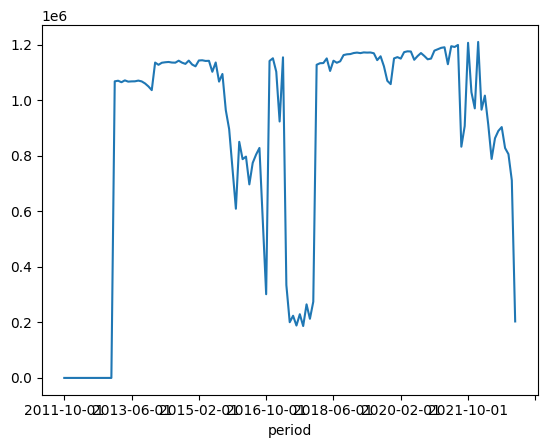

In [389]:
genout_norm.groupby('period')['total_cap_mw'].sum().plot(x='period',y='total_cap_mw')

Based on above, suspect missing data in 2022. EIA website states that data is not finalized until the fall following the reporting year.

In [390]:
# remove rows with nonsense generation values (generation exceeds reported capacity)
genout_norm = genout_norm[genout_norm.avg_mw_per_cap <= 1]

In [391]:
genout_norm.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
876,AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0,0.608298
877,AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4,0.708671
878,AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5,0.540244
879,AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3,0.305551
880,BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0,0.017448


In [392]:
# remove unneeded columns (intermediates)
genout_norm = genout_norm[['ba_code','period','avg_mw_per_cap','kg_co2_per_mwh']]
genout_norm.head()

,ba_code,period,avg_mw_per_cap,kg_co2_per_mwh
876,AEC,2013-01-01,0.608298,525.716800
877,AECI,2013-01-01,0.708671,917.291517
878,AVA,2013-01-01,0.540244,144.786473
879,AZPS,2013-01-01,0.305551,868.695961
880,BANC,2013-01-01,0.017448,60.685040


Add features to reflect hypothesized annual and 6-month seasonality. Seasonal variations are expected in solar irradiance (annual cycle) and demand (~6-month cycle due to heating demand in winter and cooling demand in summer)

In [393]:
genout_norm['period'] = pd.to_datetime(genout_norm['period'])


In [394]:
# create Julian date column (days since noon on 1 Jan 4713 BC)
genout_norm['julian'] = genout_norm['period'].apply(lambda x : pd.Timestamp(x).to_julian_date())

In [395]:
# create sine and cosine of time features
genout_norm['sin_year'] = np.sin(genout_norm['julian'] / 365.25 * 2 * np.pi)
genout_norm['cos_year'] = np.cos(genout_norm['julian'] / 365.25 * 2 * np.pi)
genout_norm['sin_6mo'] = np.sin(genout_norm['julian'] / (365.25/2) * 2 * np.pi)
genout_norm['cos_6mo'] = np.cos(genout_norm['julian'] / (365.25/2) * 2 * np.pi)
genout_norm['sin_8mo'] = np.sin(genout_norm['julian'] / (365.25*(8/12)) * 2 * np.pi)
genout_norm['cos_8mo'] = np.cos(genout_norm['julian'] / (365.25*(8/12)) * 2 * np.pi)
genout_norm['sin_13mo'] = np.sin(genout_norm['julian'] / (365.25*(13/12)) * 2 * np.pi)
genout_norm['cos_13mo'] = np.cos(genout_norm['julian'] / (365.25*(13/12)) * 2 * np.pi)

In [396]:
genout_norm = genout_norm[['ba_code', 'period', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo' \
    , 'cos_8mo', 'sin_13mo', 'cos_13mo', 'avg_mw_per_cap', 'kg_co2_per_mwh']]

In [397]:
genout_norm.head()

,ba_code,period,sin_year,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh
876,AEC,2013-01-01,-0.217577,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.608298,525.716800
877,AECI,2013-01-01,-0.217577,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.708671,917.291517
878,AVA,2013-01-01,-0.217577,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.540244,144.786473
879,AZPS,2013-01-01,-0.217577,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.305551,868.695961
880,BANC,2013-01-01,-0.217577,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.017448,60.685040


Join generation configuration and generation output data frames 

In [398]:
gen_norm = genconf_norm.set_index(['ba_code', 'period']).join(genout_norm.set_index(['ba_code', 'period']))

In [399]:
gen_norm.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG   
ba_code period                                                              
AEC     2013-01-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0  \
        2013-02-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-03-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-04-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-05-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   

                    MSW        NG  ...  sin_year  cos_year   sin_6mo   
ba_code period                     ...                                 
AEC     2013-01-01  0.0  0.707071  ... -0.217577  0.976043 -0.424728  \
        2013-02-01  0.0  0.707071  ...  0.308812  0.951123  0.587437   
        2013-03-01  0.0  0.707071  ...  0.714292  0.699848  0.999791   
        2013-04-01  0.0  0.707071  ...  0.970882  0.239557  0.465162   
        2013-05-01  0.0  0.707071  ...  0.962652 -0.270742 -0.521260   

                     cos_6mo   sin_8mo   cos_8mo  sin_13mo  cos_13mo   
ba_code period                                                         
AEC     2013-01-01  0.905321  0.323093 -0.946367 -0.844615 -0.535374  \
        2013-02-01  0.809270 -0.453703 -0.891153 -0.997359 -0.072633   
        2013-03-01 -0.020426 -0.929634 -0.368484 -0.931631  0.363405   
        2013-04-01 -0.885225 -0.912053  0.410073 -0.649269  0.760559   
        2013-05-01 -0.853398 -0.365484  0.930818 -0.228219  0.973610   

                    avg_mw_per_cap  kg_co2_per_mwh  
ba_code period                                      
AEC     2013-01-01        0.608298      525.716800  
        2013-02-01        0.591000      545.340661  
        2013-03-01        0.470554      385.393803  
        2013-04-01        0.212973      397.894067  
        2013-05-01        0.051038      622.353546  

[5 rows x 36 columns]

In [400]:
gen_norm = gen_norm.reset_index()

In [401]:
ng_price_path = 'NG_price.csv'
ng_price = pd.read_csv(ng_price_path, low_memory=False)
ng_price.head()

,period,NG_price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


In [402]:
gen_norm = gen_norm.set_index(['period']).join(ng_price.set_index('period')).reset_index()

In [403]:
gen_norm.head()

,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.608298,525.716800,3.33
1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.708671,917.291517,3.33
2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.540244,144.786473,3.33
3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.305551,868.695961,3.33
4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.017448,60.685040,3.33


In [404]:
gen_norm = gen_norm.dropna()

In [405]:
gen_norm = gen_norm.reset_index()
gen_norm.head()

,index,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.608298,525.716800,3.33
1,1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.708671,917.291517,3.33
2,2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.540244,144.786473,3.33
3,3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.305551,868.695961,3.33
4,4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.017448,60.685040,3.33


In [406]:
move_col = gen_norm.pop('ba_code')
gen_norm.insert(0, move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.608298,525.716800,3.33
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.708671,917.291517,3.33
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.540244,144.786473,3.33
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.305551,868.695961,3.33
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.017448,60.685040,3.33


In [407]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'avg_mw_per_cap', 'kg_co2_per_mwh', 'NG_price'],
      dtype='object')

In [408]:
move_col = gen_norm.pop('NG_price')
gen_norm.insert(gen_norm.columns.get_loc('avg_mw_per_cap'), move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,3.33,0.608298,525.716800
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,3.33,0.708671,917.291517
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,3.33,0.540244,144.786473
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,3.33,0.305551,868.695961
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,3.33,0.017448,60.685040


In [409]:
# normalize natural gas price
gen_norm['NG_price'] = (gen_norm['NG_price'] - gen_norm['NG_price'].min())/(gen_norm['NG_price'].max() \
    - gen_norm['NG_price'].min())

In [410]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.608298,525.716800
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.708671,917.291517
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.540244,144.786473
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.305551,868.695961
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.017448,60.685040


In [411]:
gen_norm = gen_norm.sort_values(by=['ba_code','period'])

In [412]:
gen_norm = gen_norm[gen_norm.kg_co2_per_mwh >= 0]

<Axes: xlabel='period'>

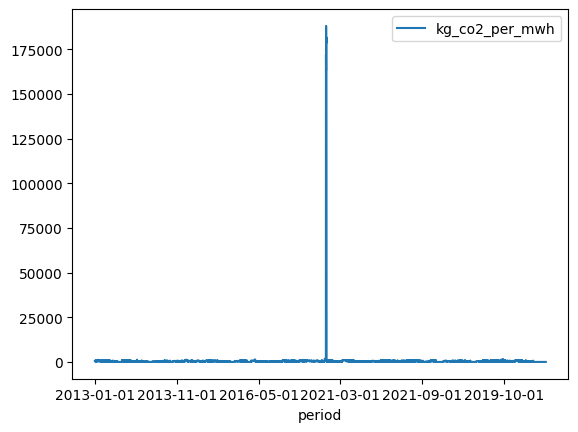

In [413]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

In [414]:
gen_norm = gen_norm.drop(gen_norm[gen_norm.kg_co2_per_mwh > 1000].index)

<Axes: xlabel='period'>

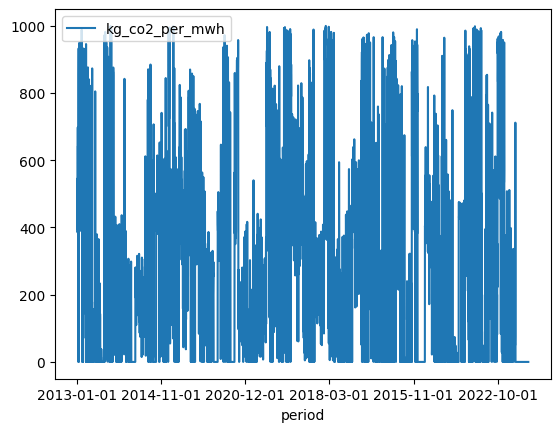

In [415]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

Use Fast Fourier Transform to check for actual seasonality in the response variable

In [416]:
ci_monthly = gen_norm.groupby('period')['kg_co2_per_mwh'].mean()
ci_monthly.head()

period
2013-01-01    425.791310
2013-02-01    420.214739
2013-03-01    352.115789
2013-04-01    439.209743
2013-05-01    357.093198
Name: kg_co2_per_mwh, dtype: float64

In [417]:
type(ci_monthly)

pandas.core.series.Series

Text(0.5, 0, '# Cycles in full window of data (~5 years)')

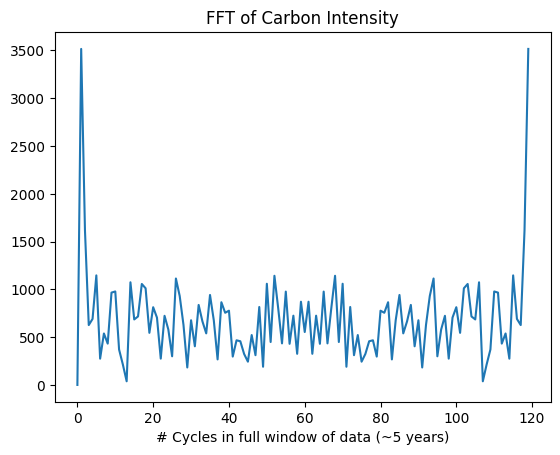

In [418]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

# apply FFT to emissions intensity deviation from mean
fft_ci = fft((ci_monthly - ci_monthly.mean()).values)

# plot emissions intensity deviation in frequency domain
plt.plot(np.abs(fft_ci))
plt.title("FFT of Carbon Intensity")
plt.xlabel('# Cycles in full window of data (~5 years)')

Text(0.5, 0, 'Frequency ($y^{-1}$)')

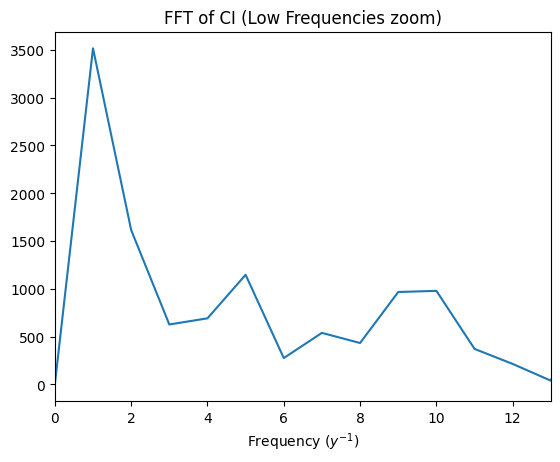

In [419]:
# zoom on sub-annual frequencies
plt.plot(np.abs(fft_ci))
plt.title("FFT of CI (Low Frequencies zoom)")
plt.xlim([0,13])
plt.xlabel('Frequency ($y^{-1}$)')

Examine features graphically

In [420]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'NG_price', 'avg_mw_per_cap', 'kg_co2_per_mwh'],
      dtype='object')

C:\Users\lilye\AppData\Local\Temp\ipykernel_19584\3986892565.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


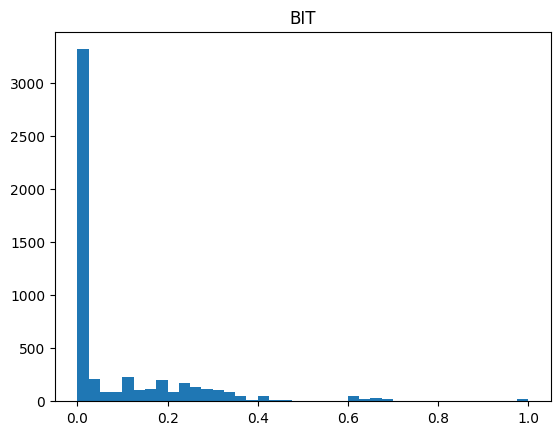

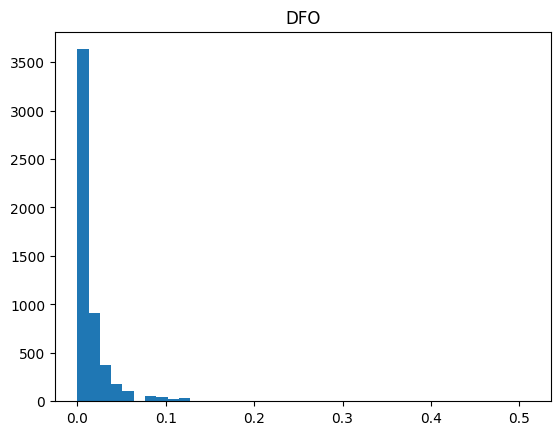

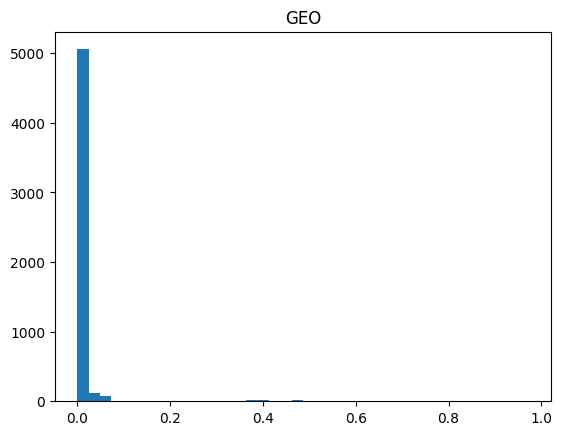

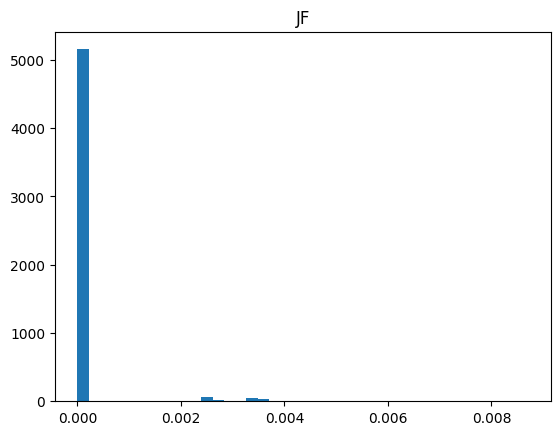

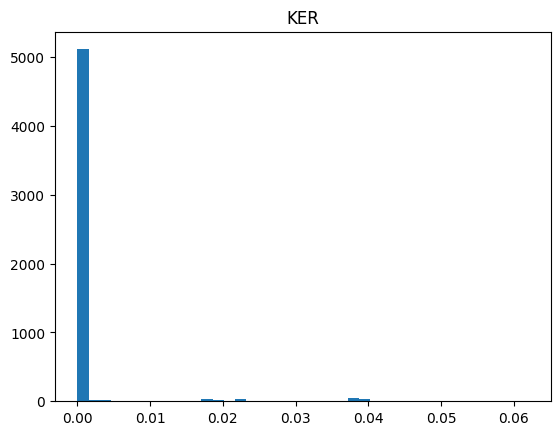

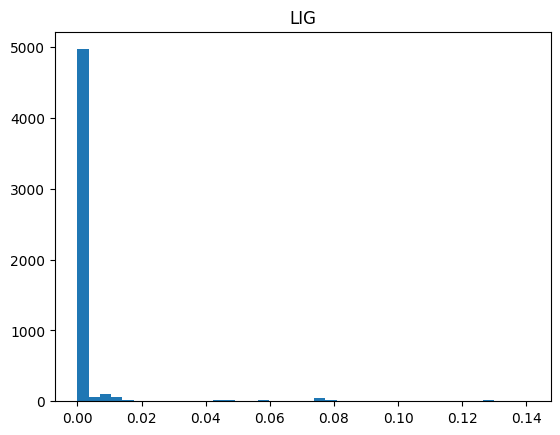

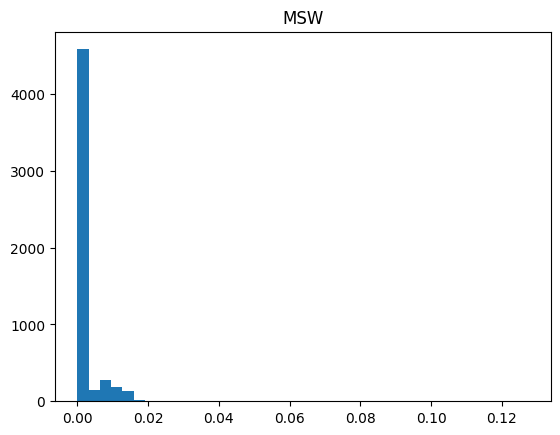

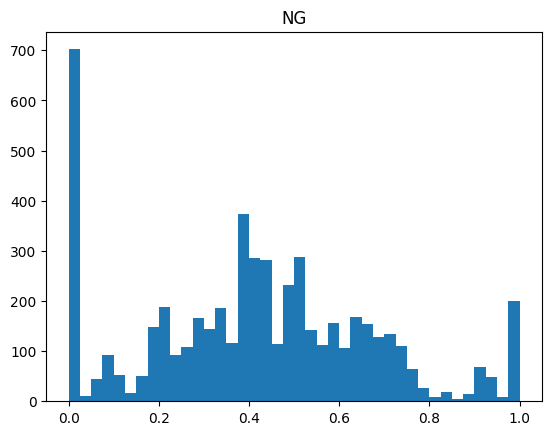

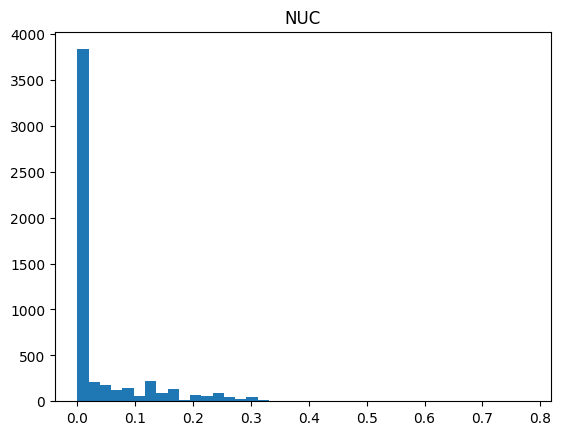

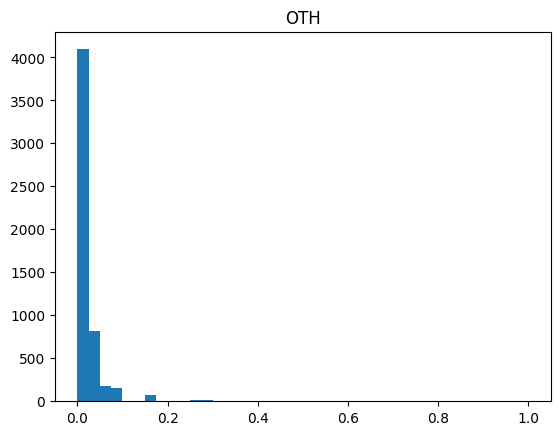

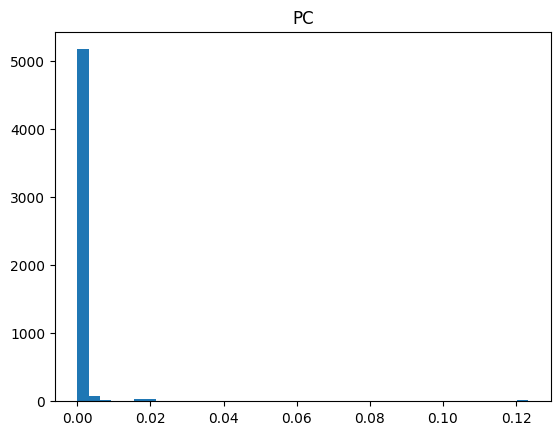

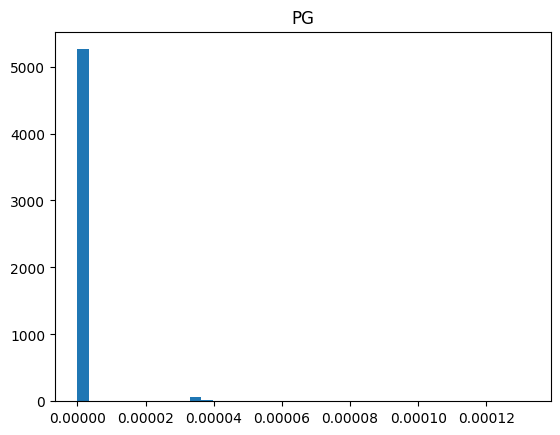

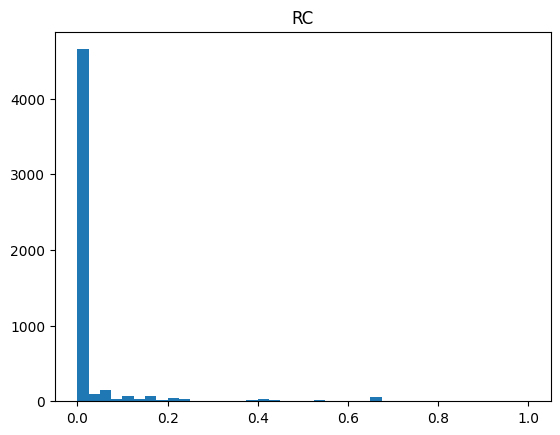

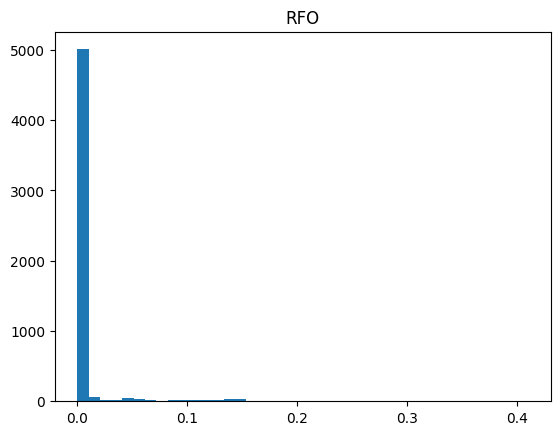

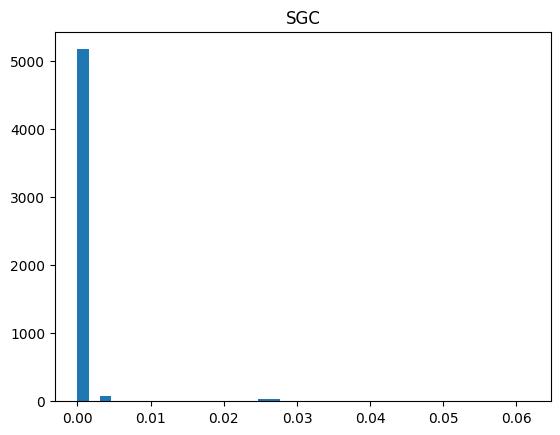

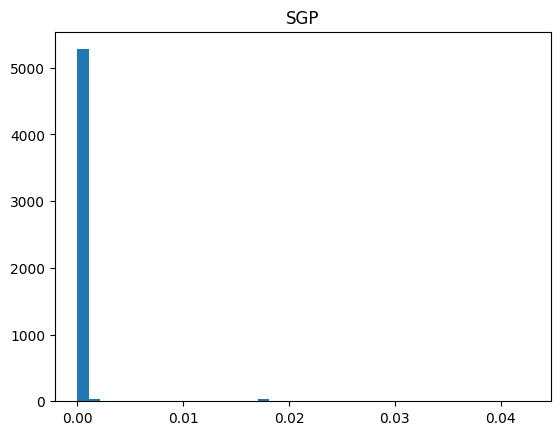

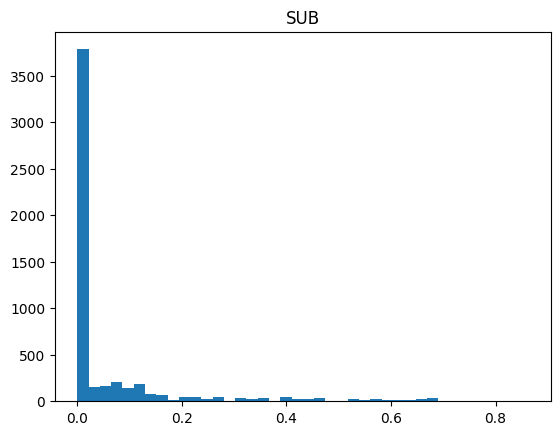

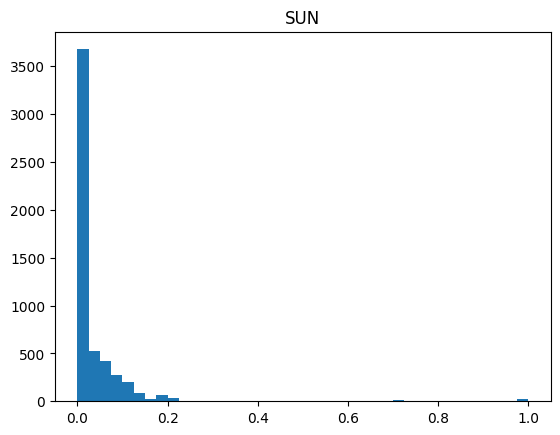

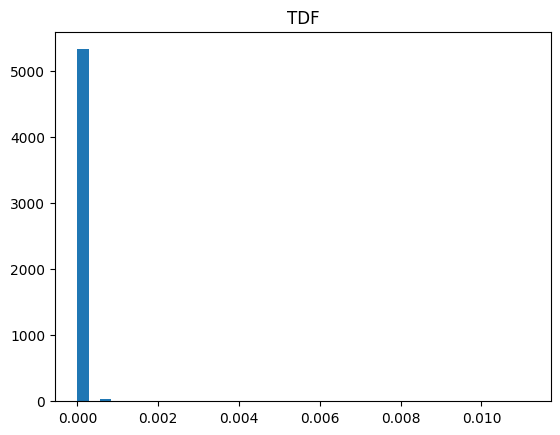

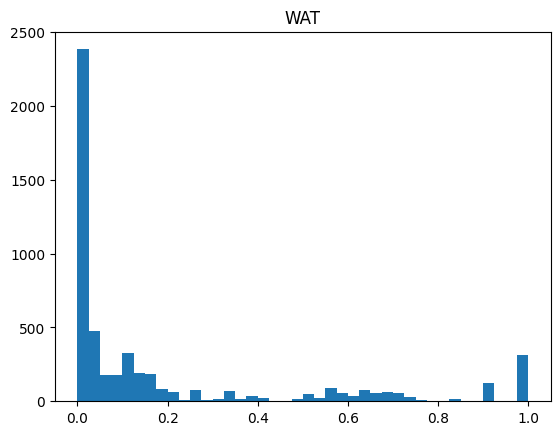

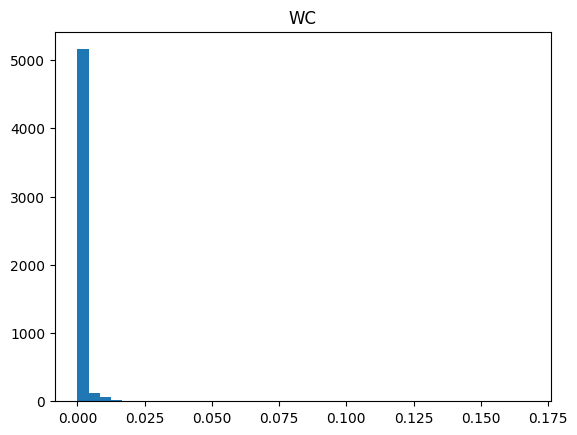

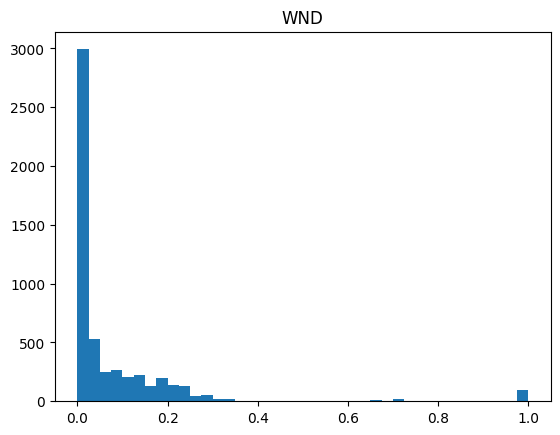

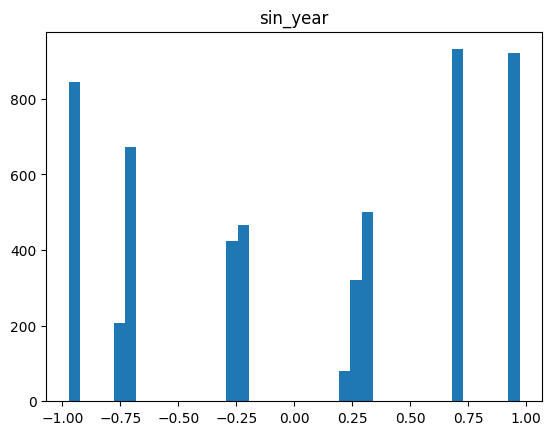

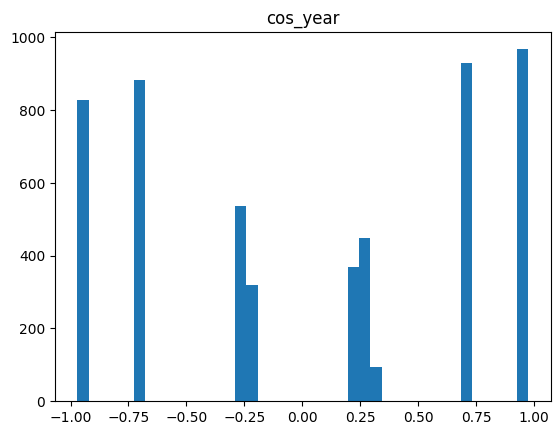

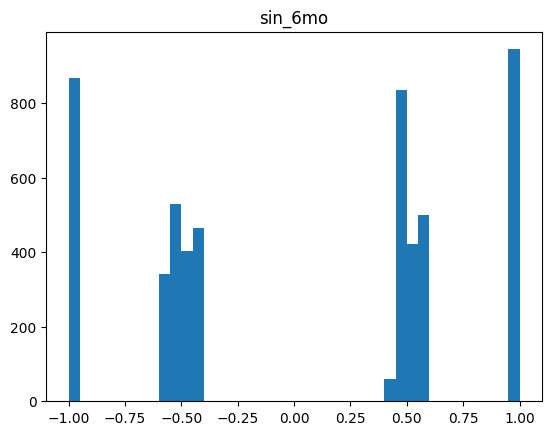

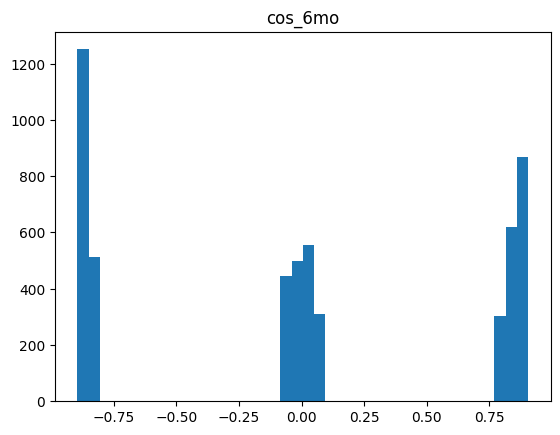

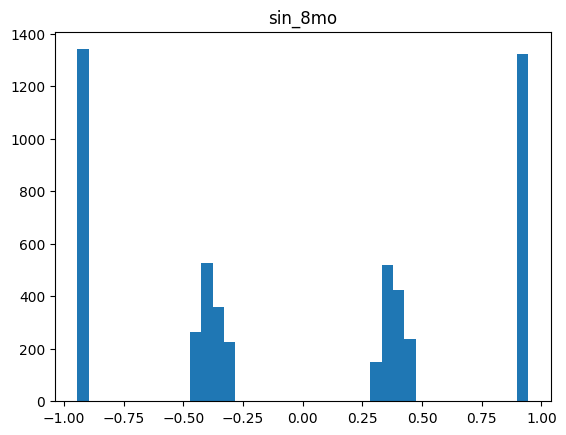

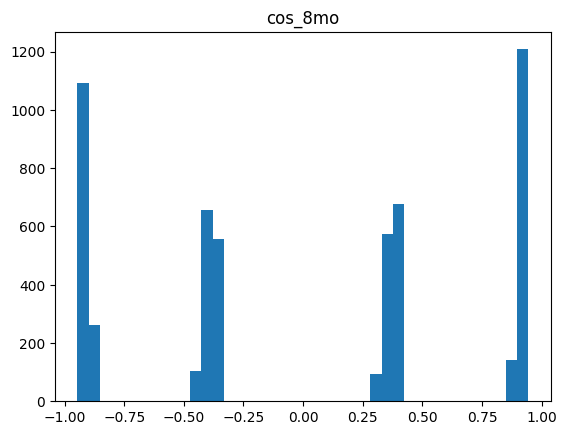

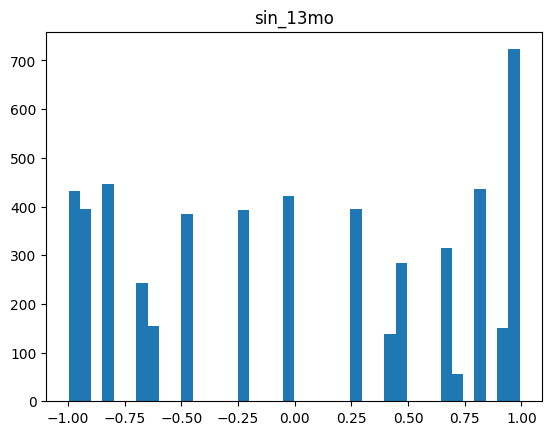

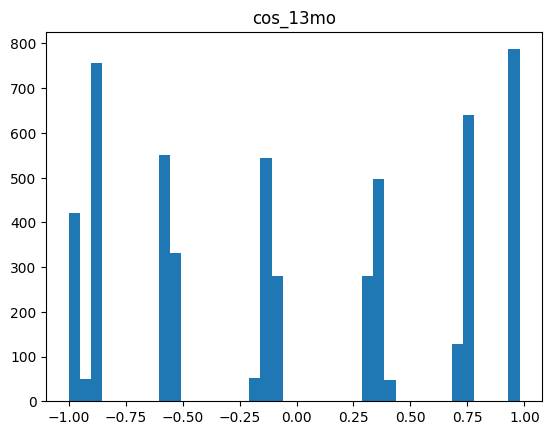

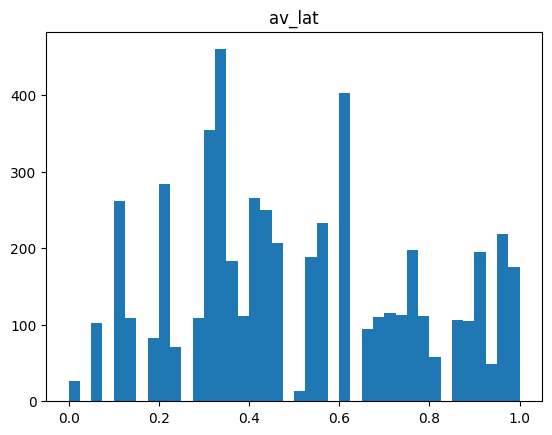

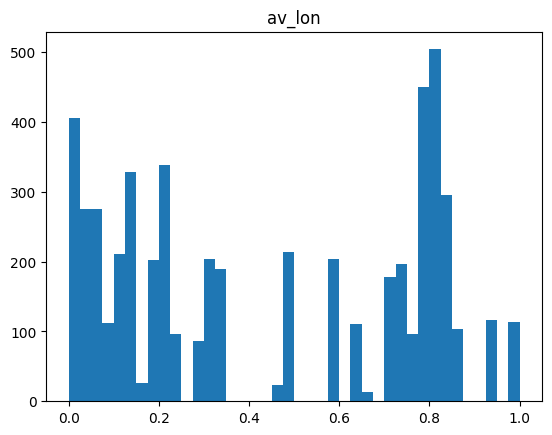

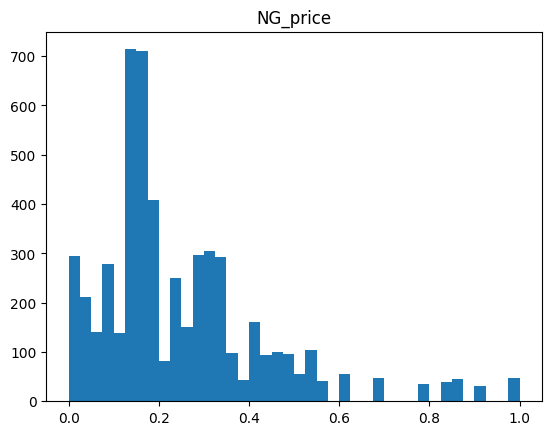

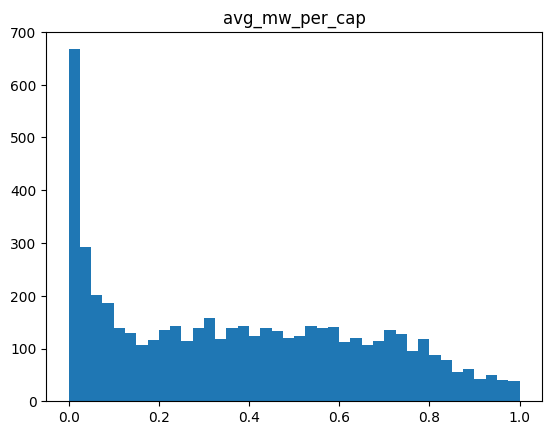

In [421]:
X_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH'
       ,'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC'
       ,'WND', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo'
       , 'sin_13mo', 'cos_13mo', 'av_lat', 'av_lon' 
       , 'NG_price', 'avg_mw_per_cap'
       ]
for X in X_names:
    plt.figure()
    plt.title(X)
    plt.hist(gen_norm[X], bins=40)


In [422]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.608298,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,-0.997359,-0.072633,0.236769,0.591000,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,-0.931631,0.363405,0.303621,0.470554,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,-0.649269,0.760559,0.353760,0.212973,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,-0.228219,0.973610,0.335655,0.051038,622.353546


Most features appear right-skewed. Apply log transform using log(1+X). Avoids undefined result at log(0).

In [423]:
import numpy as np

# list feature names to log transform
X_log_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_log = gen_norm.copy()
gen_norm_log[X_log_names] = gen_norm_log[X_log_names].apply(lambda x: np.log(1+x))
gen_norm_log.head()


,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.212502,0.475176,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,-0.997359,-0.072633,0.212502,0.464363,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,-0.931631,0.363405,0.265146,0.385640,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,-0.649269,0.760559,0.302886,0.193074,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,-0.228219,0.973610,0.289422,0.049778,622.353546


In [424]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.236769,0.608298,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,-0.997359,-0.072633,0.236769,0.591000,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,-0.931631,0.363405,0.303621,0.470554,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,-0.649269,0.760559,0.353760,0.212973,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,-0.228219,0.973610,0.335655,0.051038,622.353546


Compare untransformed and transformed features graphically

C:\Users\lilye\AppData\Local\Temp\ipykernel_19584\2751625301.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


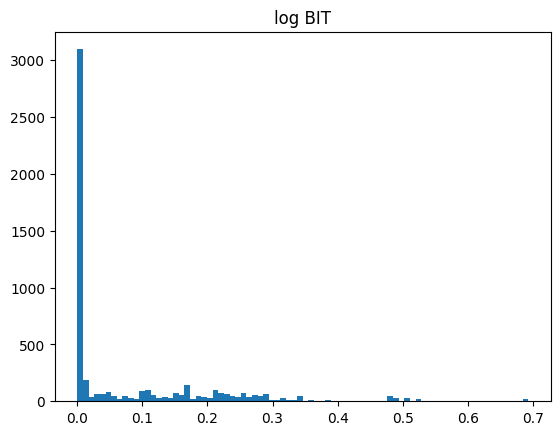

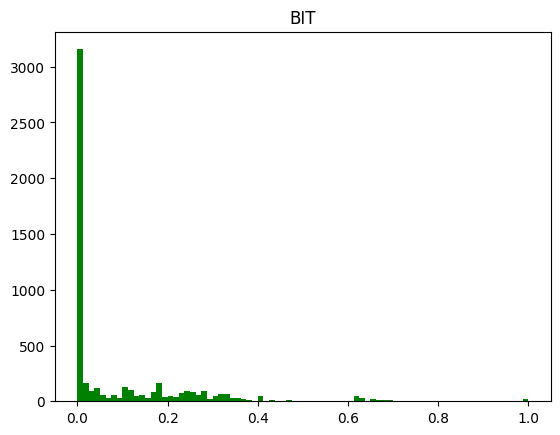

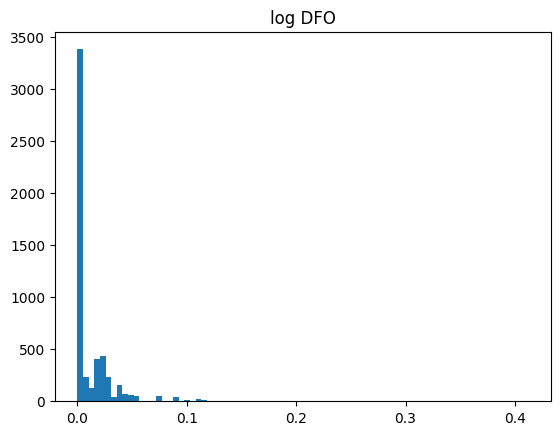

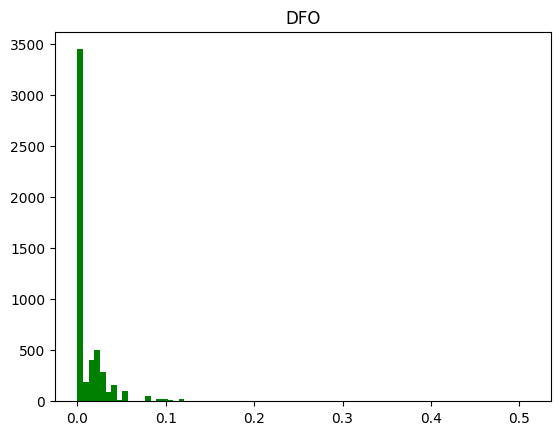

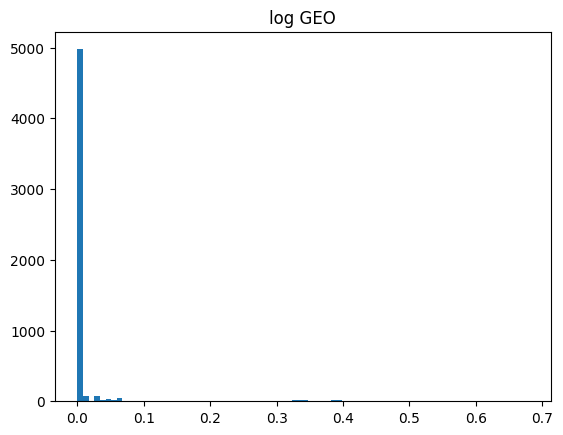

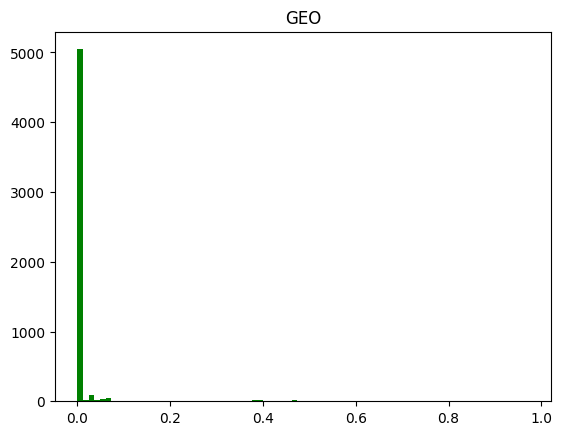

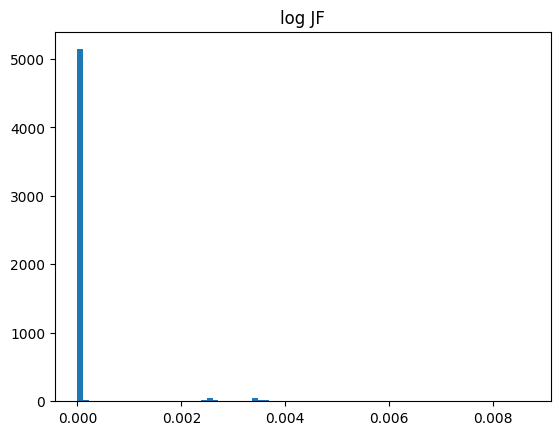

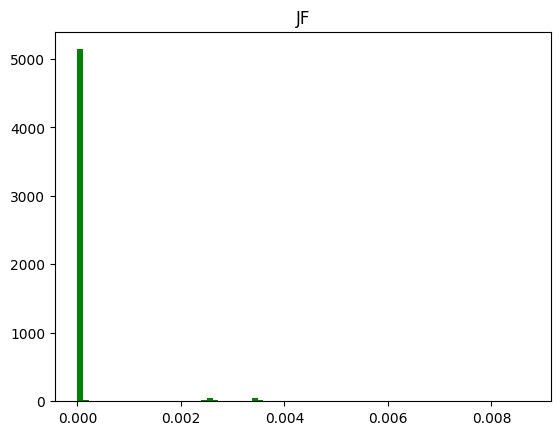

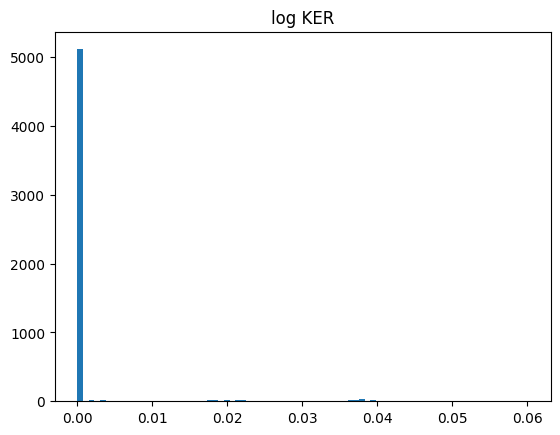

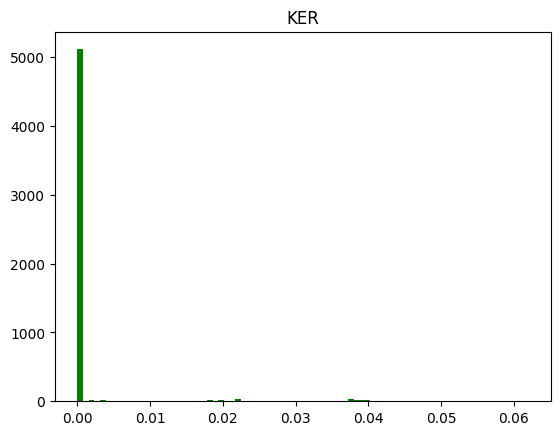

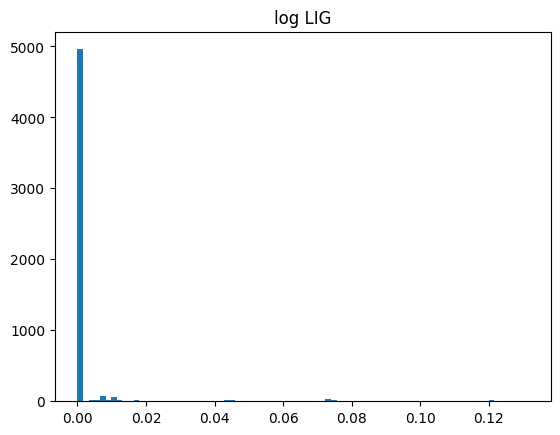

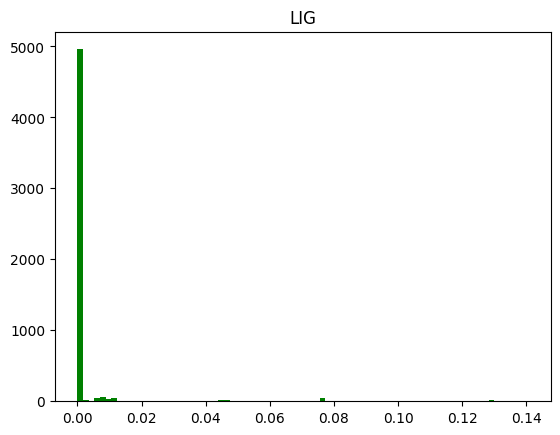

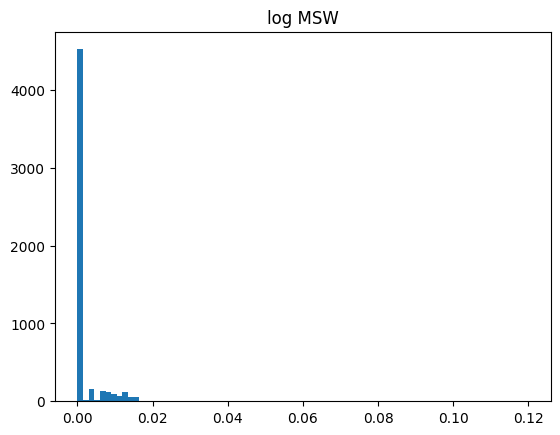

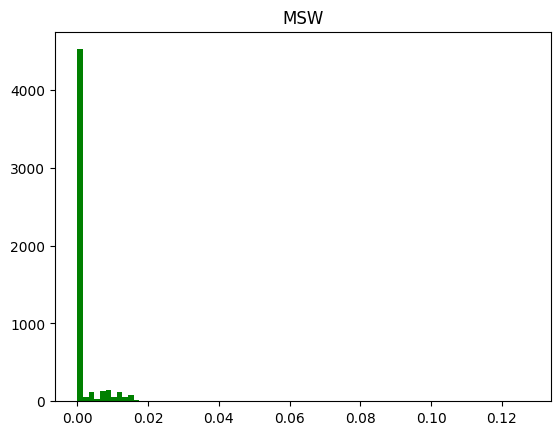

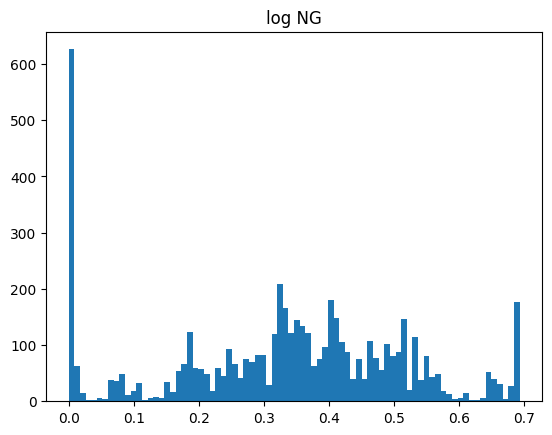

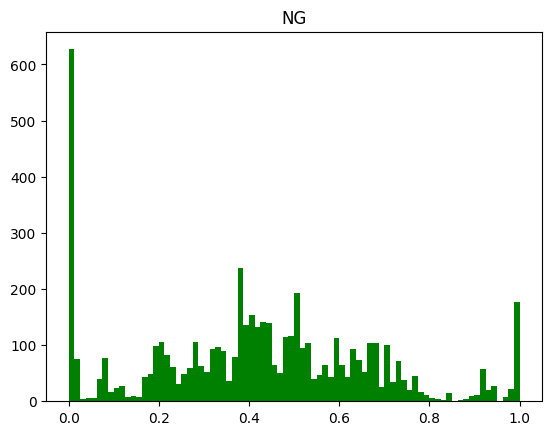

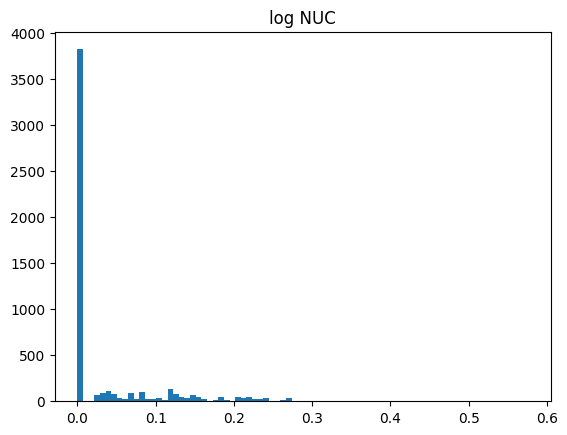

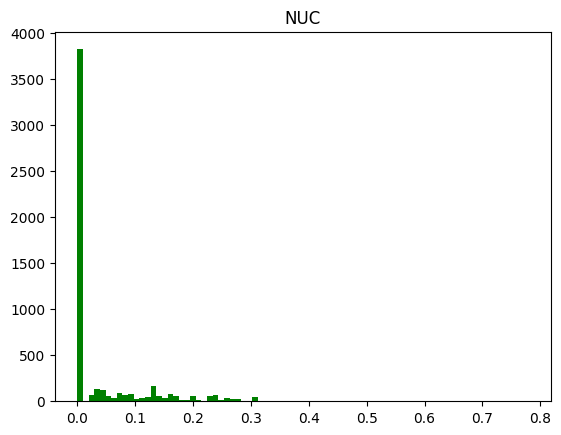

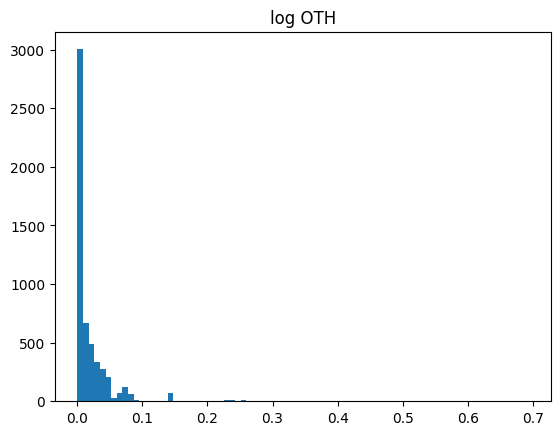

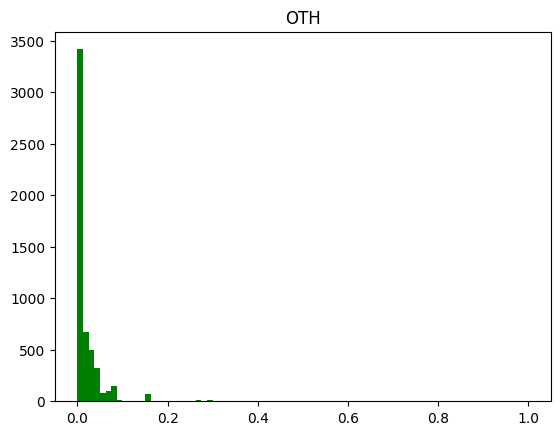

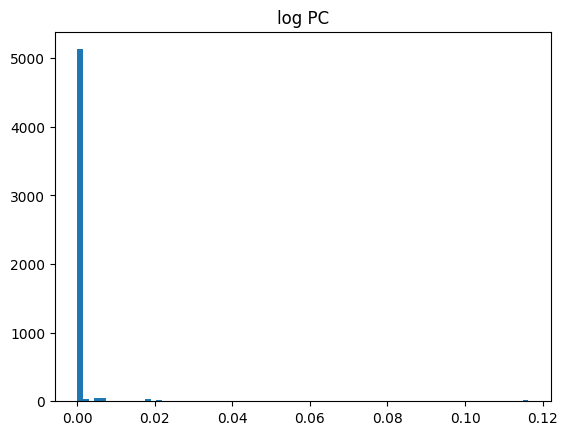

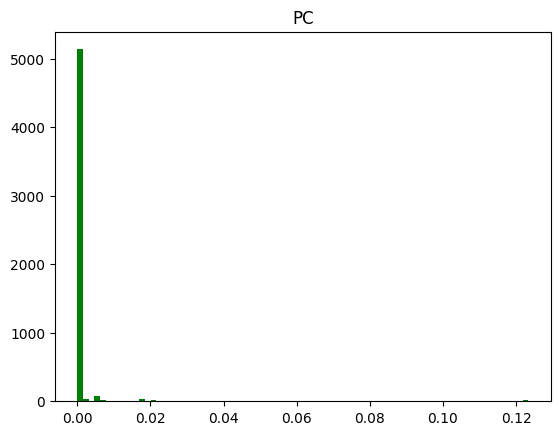

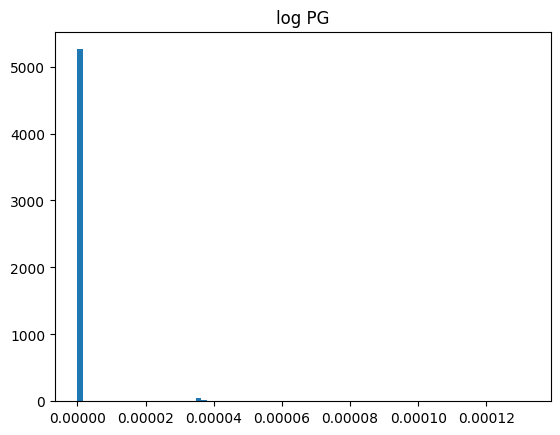

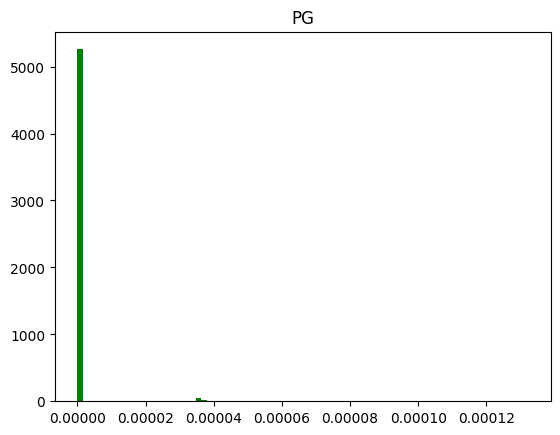

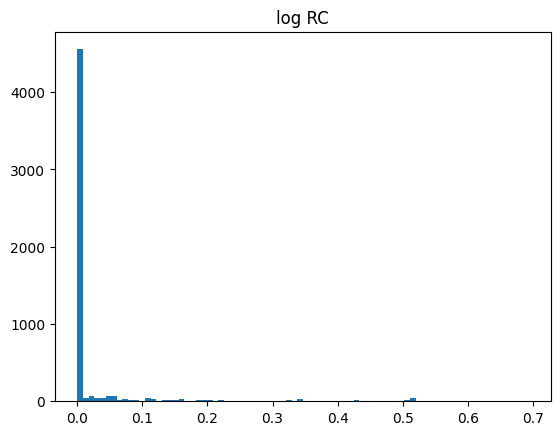

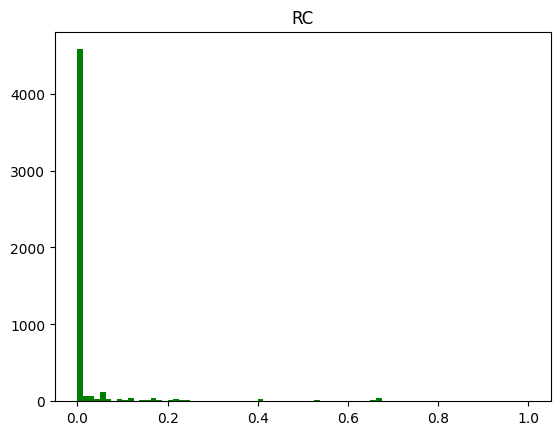

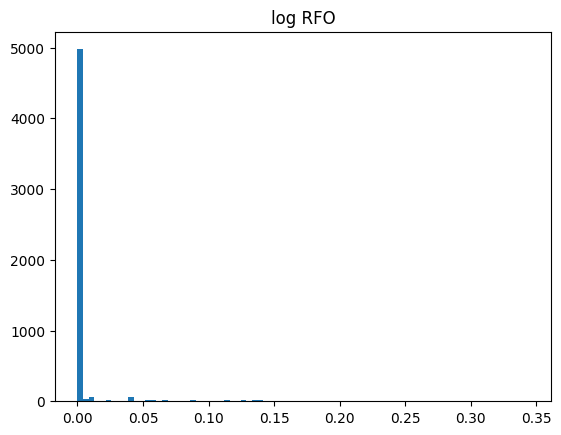

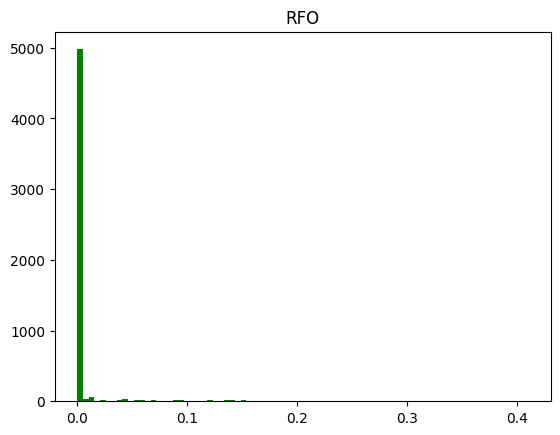

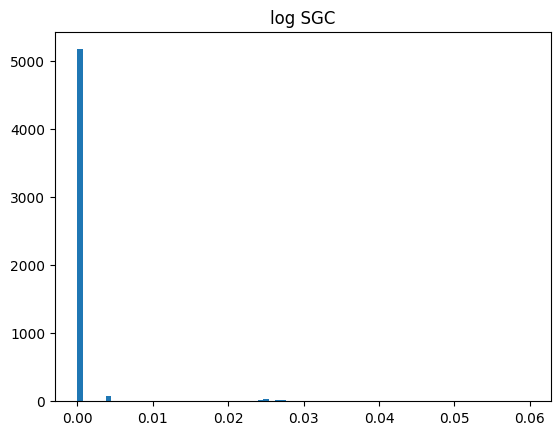

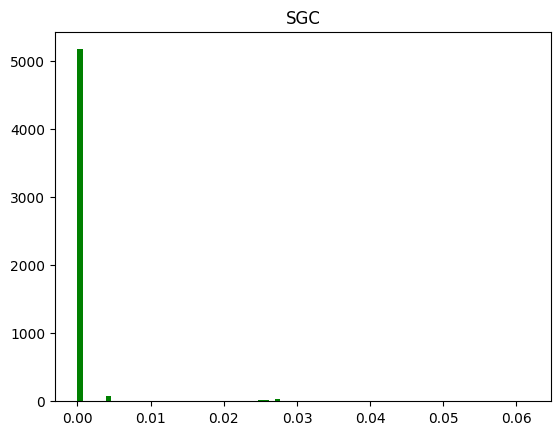

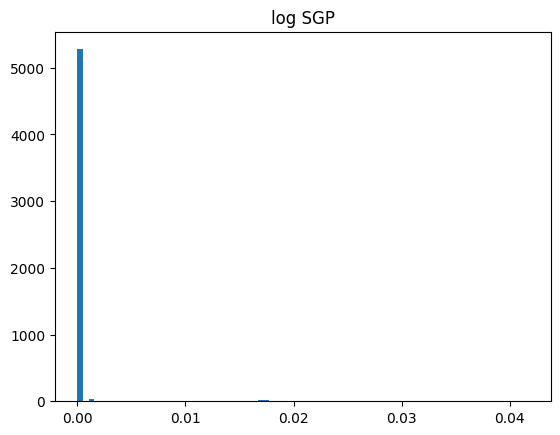

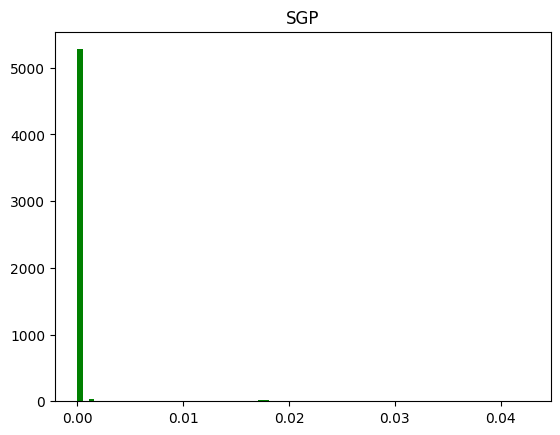

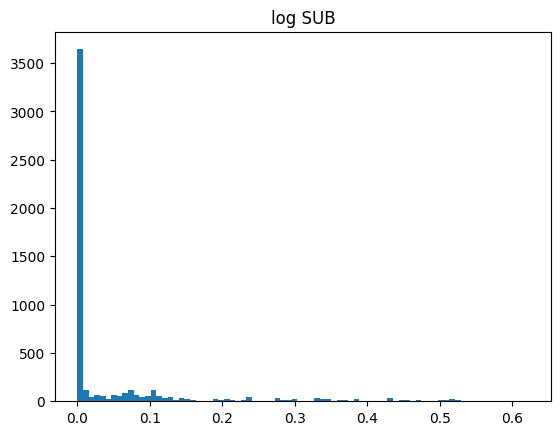

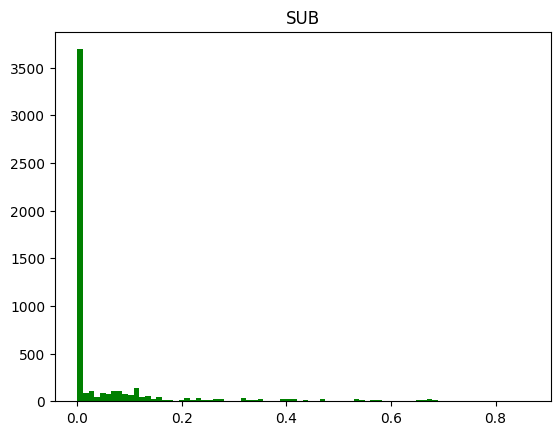

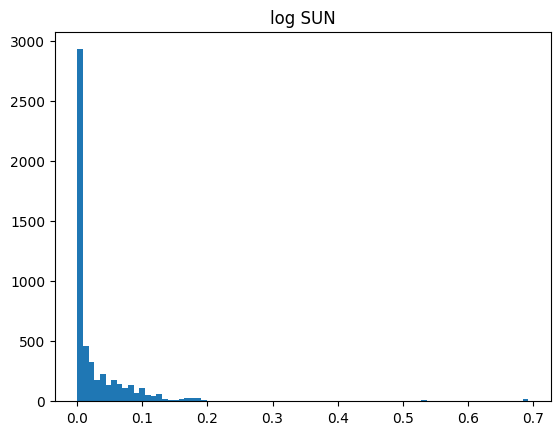

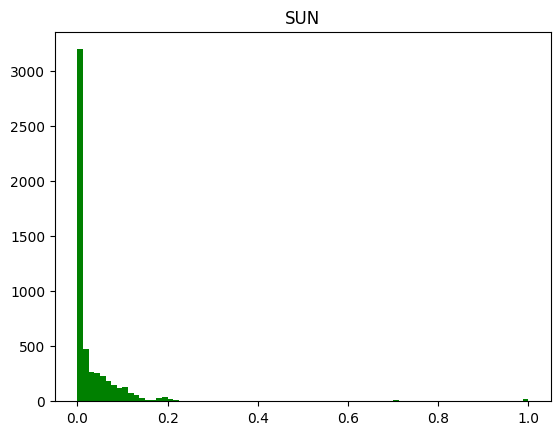

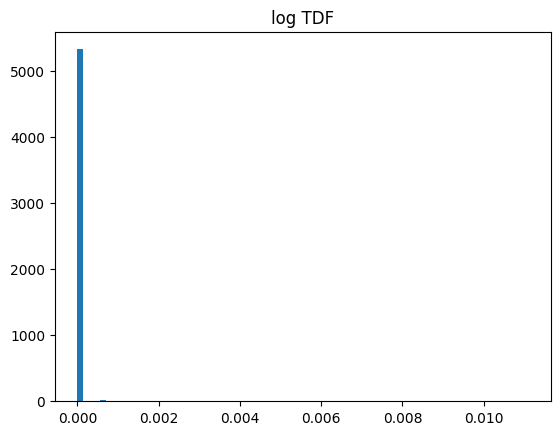

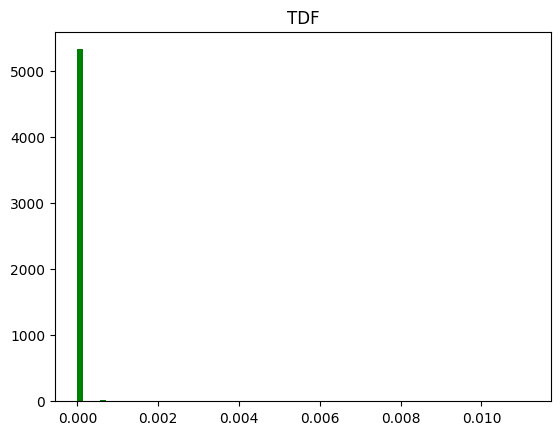

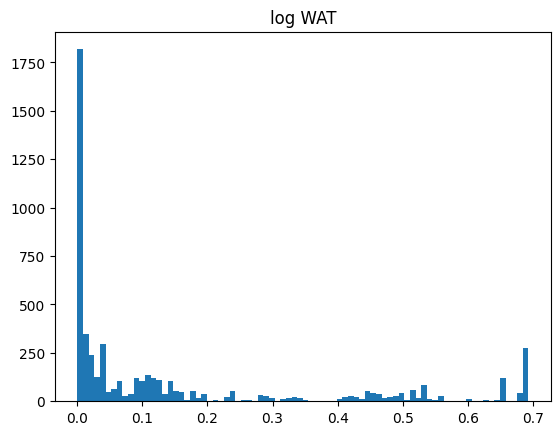

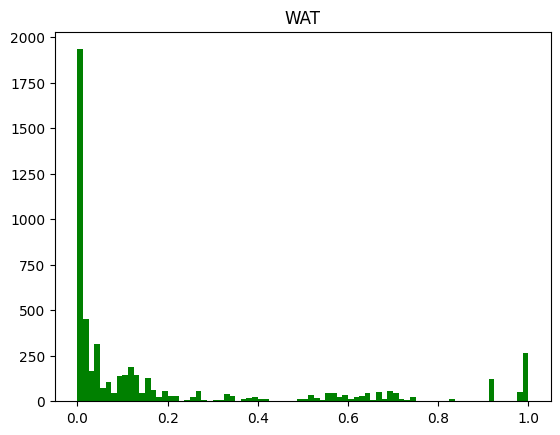

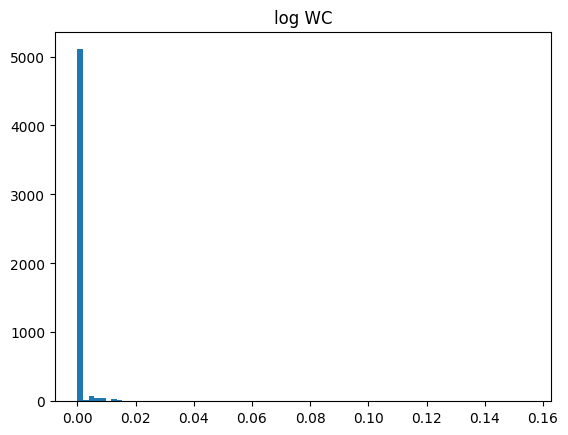

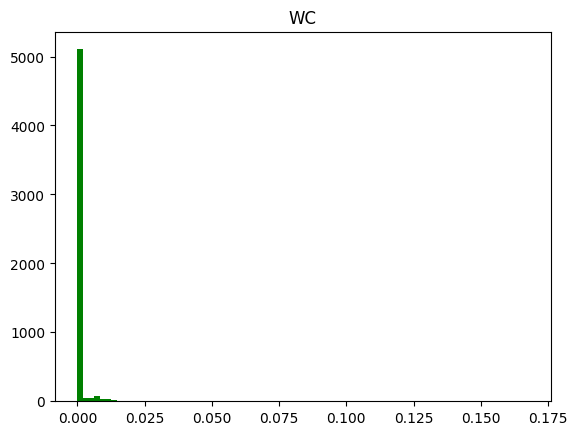

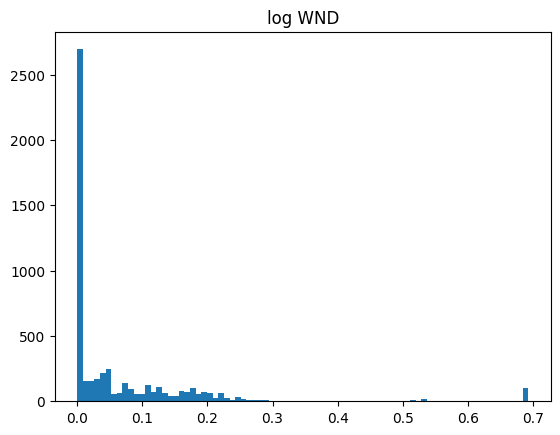

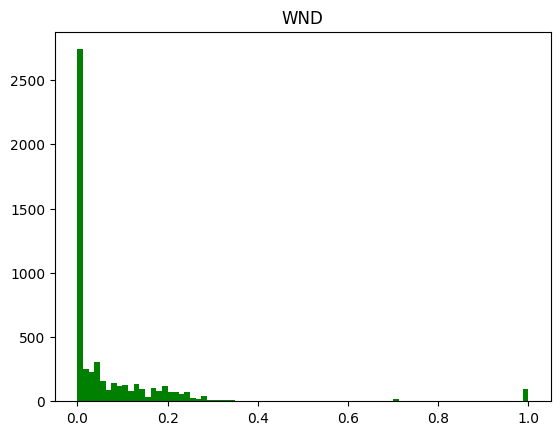

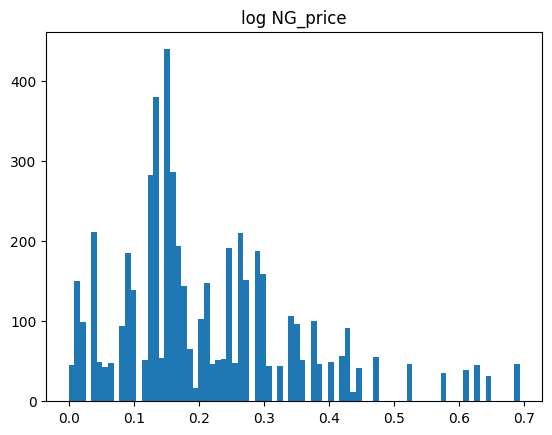

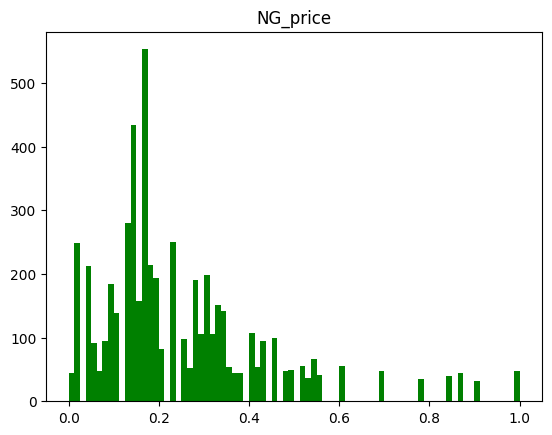

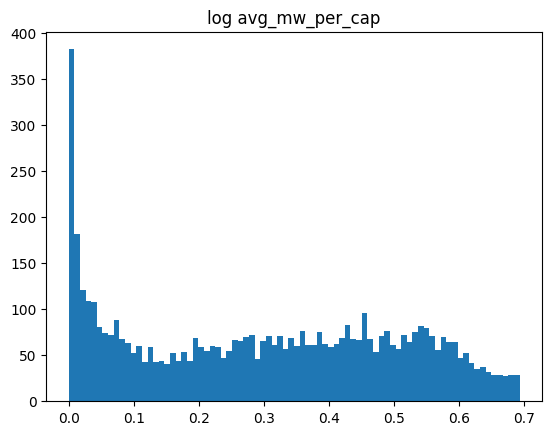

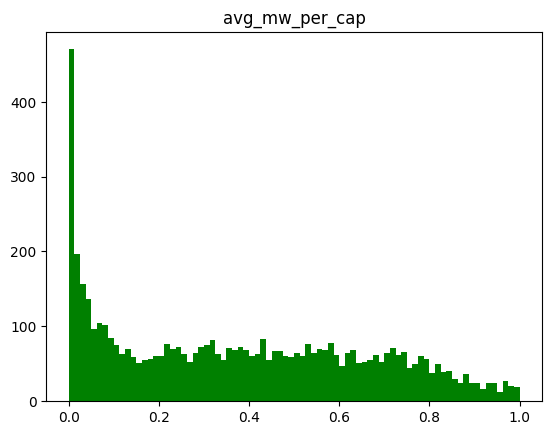

In [425]:
for X_log in X_log_names:
    plt.figure()
    plt.title(f"log {X_log}")
    plt.hist(gen_norm_log[X_log], bins=80)
    plt.figure()
    plt.title(X_log)
    plt.hist(gen_norm[X_log], bins=80, color = 'green')

In [426]:
gen_norm_log.shape

(5367, 40)

In [427]:
from scipy import stats

# list feature names to box cox transform
X_bxcx_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_bxcx = gen_norm.copy()
gen_norm_bxcx[X_bxcx_names] = gen_norm_bxcx[X_bxcx_names].apply(lambda x: stats.boxcox(1+x)[0])
gen_norm_bxcx.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.097524,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.159911,0.457154,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.097524,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,-0.997359,-0.072633,0.159911,0.447141,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.097524,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,-0.931631,0.363405,0.186805,0.373711,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.097524,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,-0.649269,0.760559,0.203774,0.190053,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.097524,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,-0.228219,0.973610,0.197926,0.049575,622.353546


C:\Users\lilye\AppData\Local\Temp\ipykernel_19584\2720411206.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


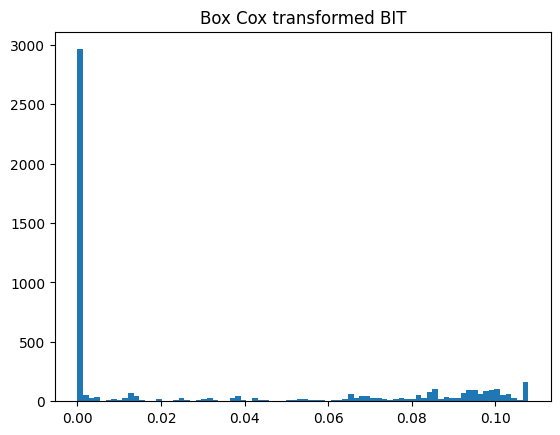

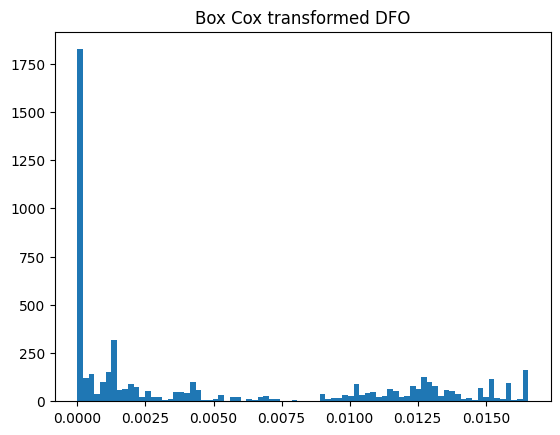

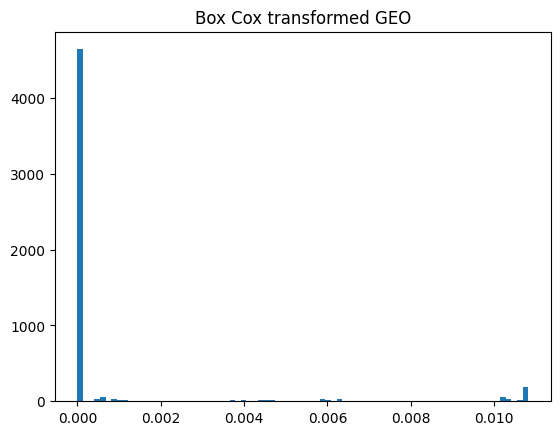

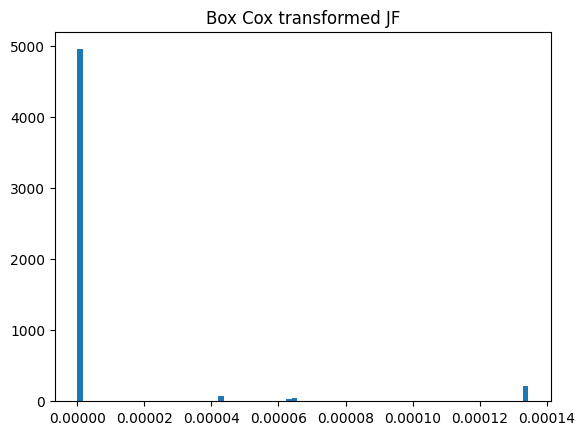

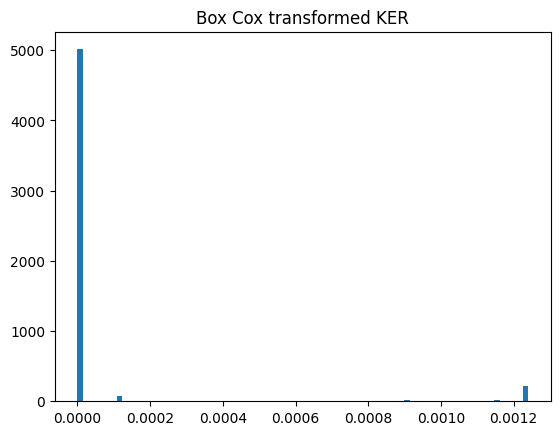

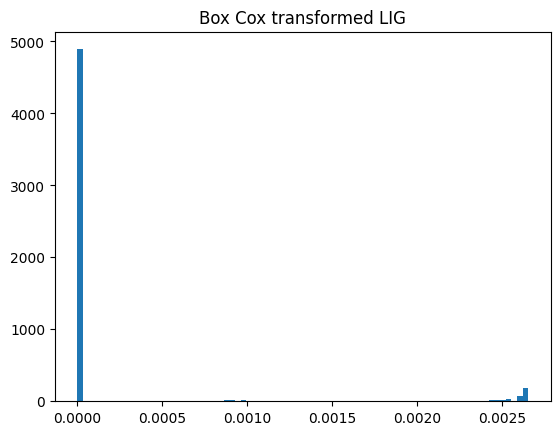

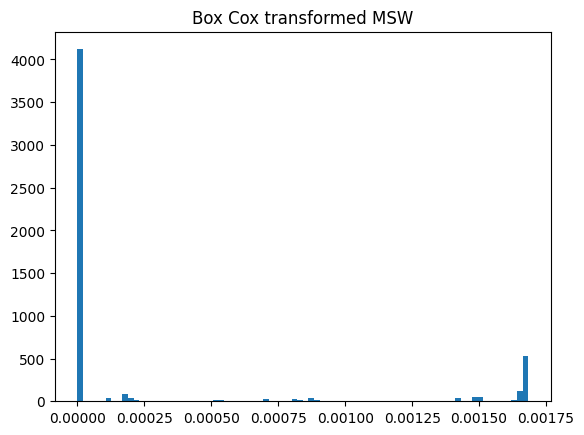

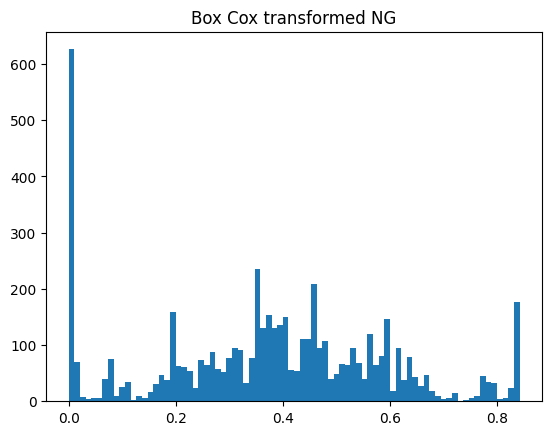

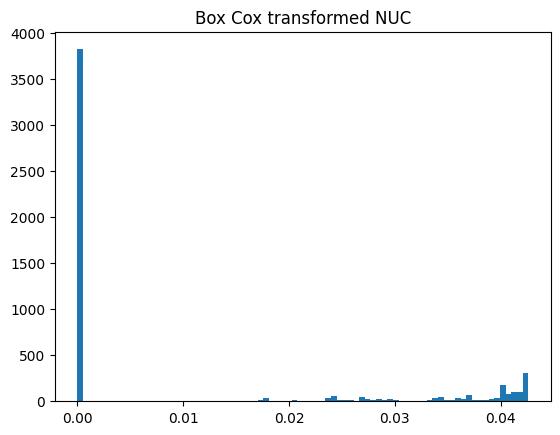

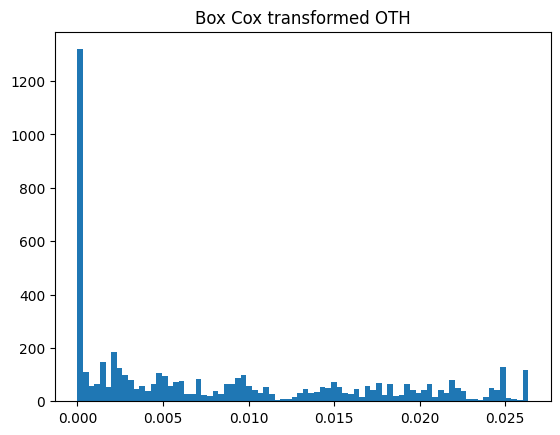

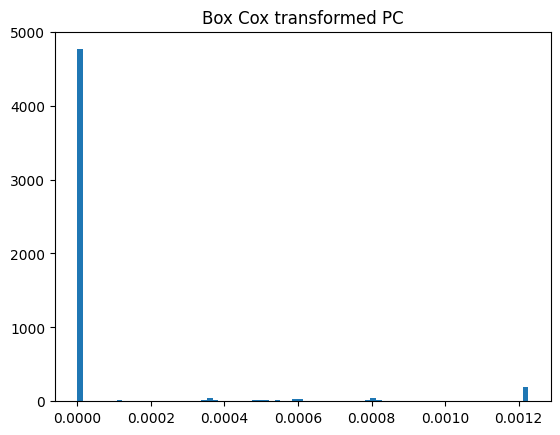

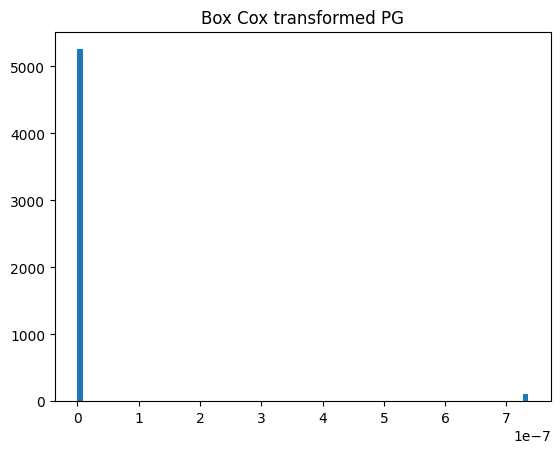

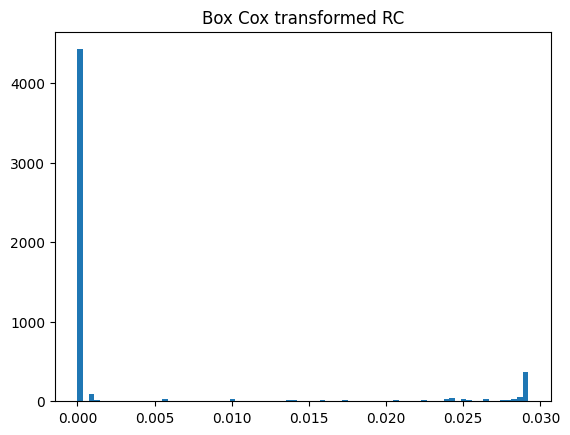

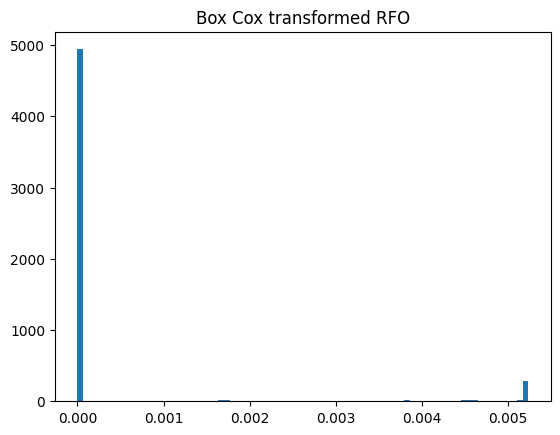

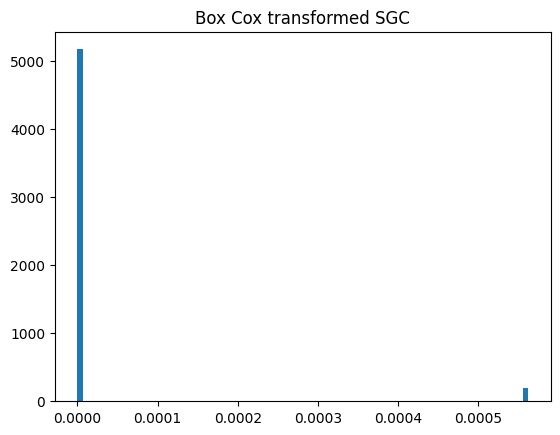

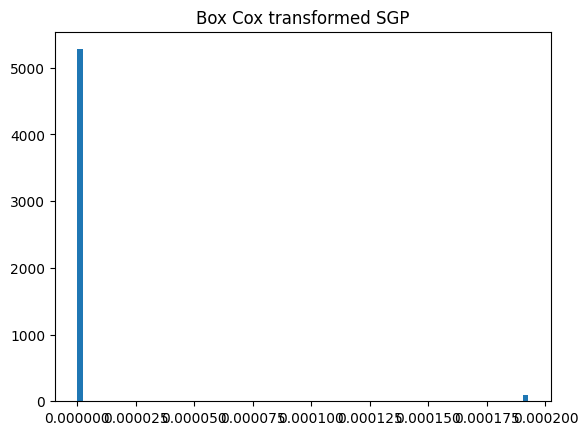

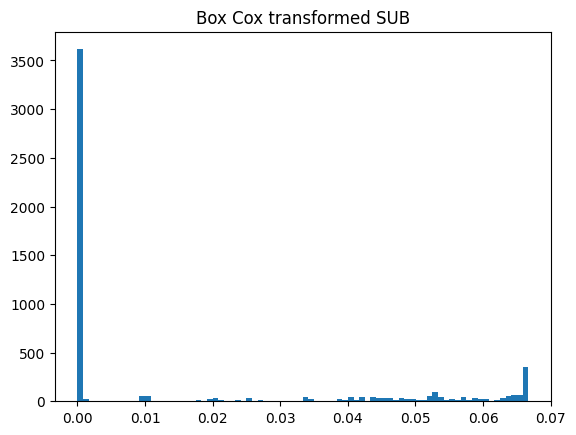

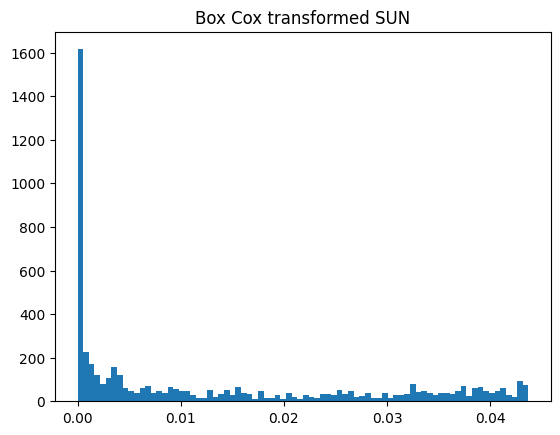

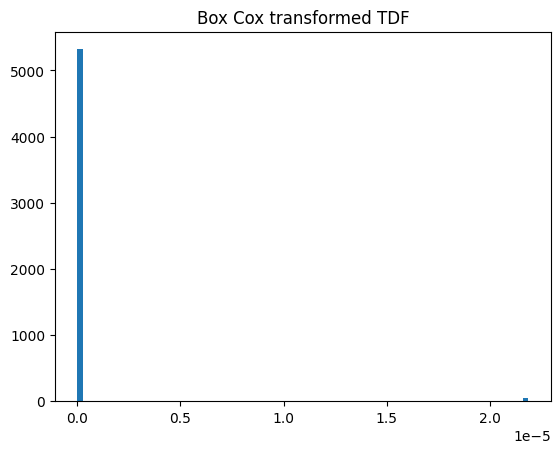

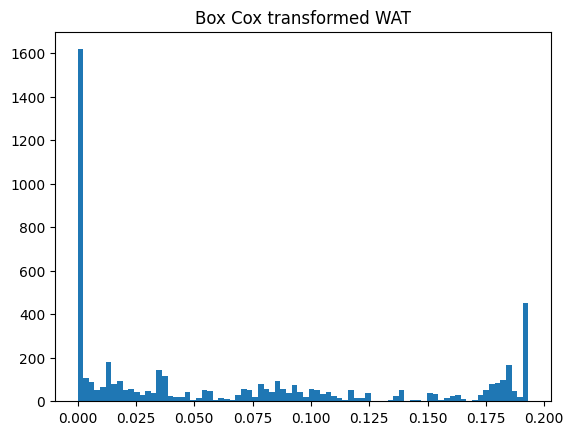

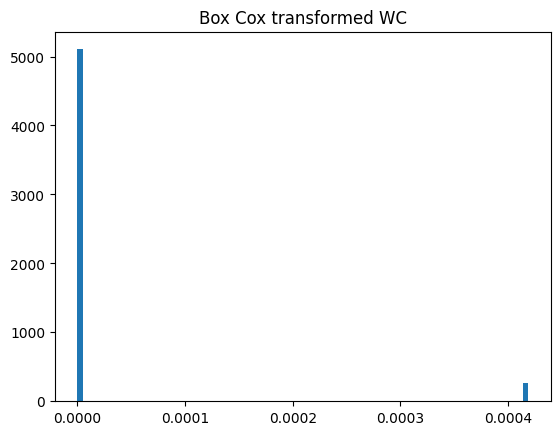

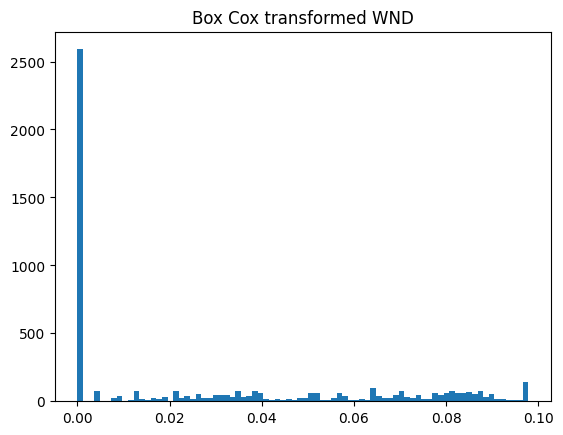

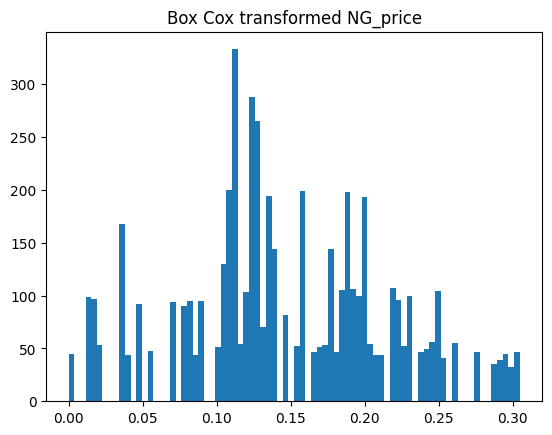

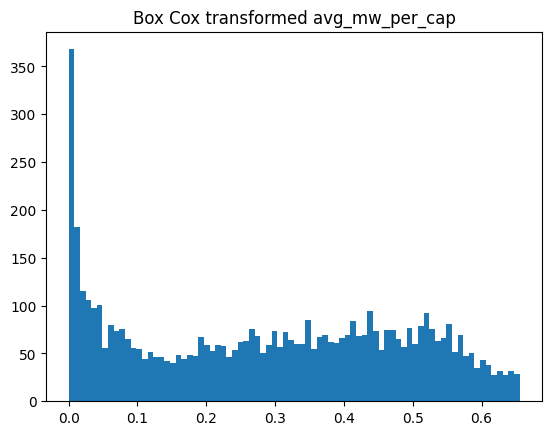

In [428]:
for X_bxcx in X_bxcx_names:
    plt.figure()
    plt.title(f"Box Cox transformed {X_bxcx}")
    plt.hist(gen_norm_bxcx[X_bxcx], bins=80)

In [429]:
# list feature names to sqrt transform
X_sqrt_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_sqrt = gen_norm.copy()
gen_norm_sqrt[X_sqrt_names] = gen_norm_sqrt[X_sqrt_names].apply(lambda x: x**.5)
gen_norm_sqrt.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,-0.844615,-0.535374,0.486589,0.779934,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,-0.997359,-0.072633,0.486589,0.768765,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,-0.931631,0.363405,0.551018,0.685970,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,-0.649269,0.760559,0.594778,0.461490,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,-0.228219,0.973610,0.579357,0.225915,622.353546


Correlation Matrices

<Axes: >

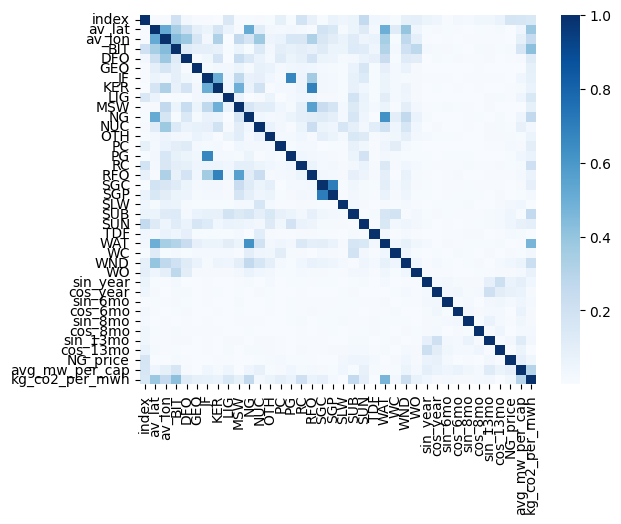

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt
    
sns.heatmap(data=abs(gen_norm.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

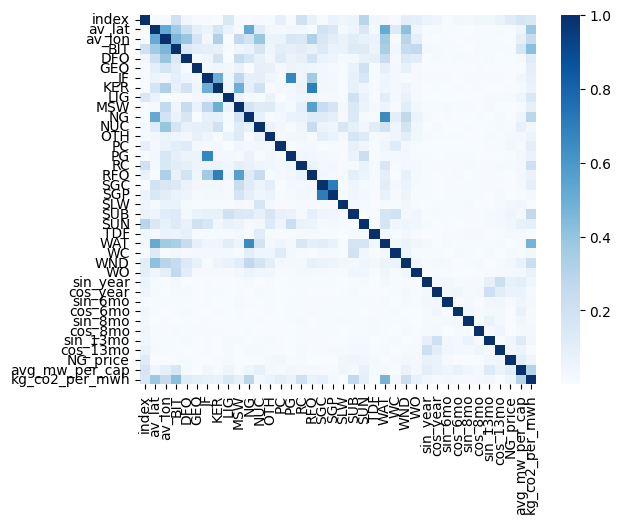

In [431]:
sns.heatmap(data=abs(gen_norm_log.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

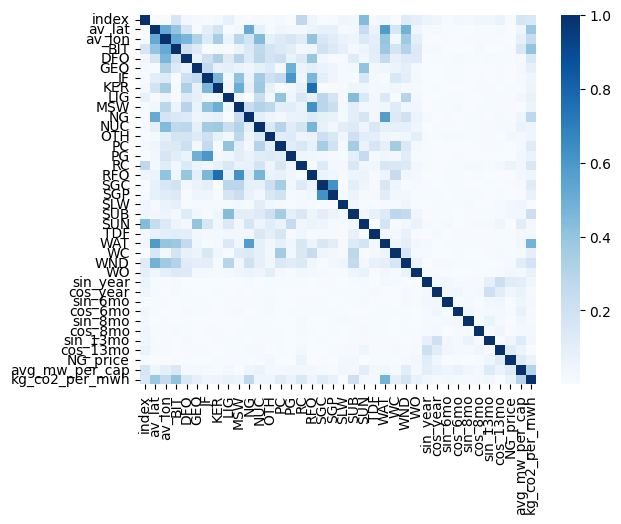

In [432]:
sns.heatmap(data=abs(gen_norm_bxcx.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

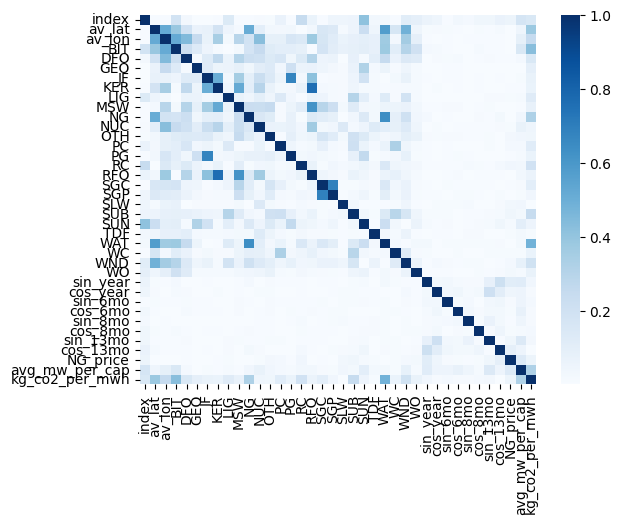

In [433]:
sns.heatmap(data=abs(gen_norm_sqrt.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

### Multiple Linear Regression
 * Response variable is CO2 Intensity (kg CO2 per MW-hr generated)
 * Explanatory variables are selected features in the following categories: generator configuration (installed capacity by fuel source), specific power, location (geographical average for BA), seasonality, fuel price (natural gas only)

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [435]:
# split
def split(dataset, feature_names, response_name):
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[feature_names], dataset[response_name], test_size=0.33, random_state=347)
    return x_train, x_test, y_train, y_test

In [436]:
# train
def trainLinear(x_train, y_train):
    linearModel = LinearRegression()
    linearModel.fit(x_train, y_train)
    return linearModel

In [437]:
# test
# send test set independent variables to model
def testLinear(linearModel, x_test, y_test, feature_names):
    y_pred = linearModel.predict(x_test)
    # evaluate how well model outputs predict test set response variable
    mse = mean_squared_error(y_test, y_pred)
    r_sq = r2_score(y_test, y_pred)
    coeffs_dict = {}
    for x in range(0,len(feature_names)):
        coeffs_dict[feature_names[x]] = linearModel.coef_[x]
    intercept = linearModel.intercept_
    test_R_sq = r_sq
    return coeffs_dict, intercept, test_R_sq
   

In [438]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'NG_price', 'avg_mw_per_cap', 'kg_co2_per_mwh'],
      dtype='object')

In [439]:
# function that performs split, train, and test; returns linear regression model
def linearTrainTest(dataset, X_names, y_name):
    X_train, X_test, y_train, y_test = split(dataset, X_names, y_name)
    lin_mod = trainLinear(X_train, y_train)
    coeffs, intcp, r2 = testLinear(lin_mod, X_test, y_test, X_names)
    print(f"coeffs:  {coeffs}")
    print(f"intercept:  {intcp}")
    print(f"train R squared:  {lin_mod.score(X_train, y_train)}")
    print(f"test R squared:  {r2}\n")
    return lin_mod

Select feature names manually, train and test models

In [440]:
X_names = [ 'NG', 'WND', 'WAT', 'NUC', 'BIT', 'SUB', 'RC', 'SUN', 'DFO', 'OTH', 'RFO', 'GEO'
       #, 'JF', 'KER', 'LIG', 'MSW', 'PC', 'PG',   'SGC', 'SGP',   'TDF',  'WC' 
       , 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo'
       , 'sin_13mo', 'cos_13mo', 'NG_price'
       , 'av_lat', 'av_lon' 
       , 'avg_mw_per_cap'
       ]
print('baseline:')
lmod_n = linearTrainTest(gen_norm, X_names, 'kg_co2_per_mwh')
print('log transforms:')
lmod_n_log = linearTrainTest(gen_norm_log, X_names, 'kg_co2_per_mwh')
print('box cox transforms:')
lmod_n_bxcx = linearTrainTest(gen_norm_bxcx, X_names, 'kg_co2_per_mwh')
print('sqrt transforms:')
lmod_n_sqrt = linearTrainTest(gen_norm_sqrt, X_names, 'kg_co2_per_mwh')

baseline:
coeffs:  {'NG': -728.9920850115934, 'WND': -1083.934816289682, 'WAT': -1084.1435134956107, 'NUC': -1324.3735012251032, 'BIT': -240.9318979661547, 'SUB': -334.04520083394044, 'RC': -282.8948349968213, 'SUN': -1063.3894825433815, 'DFO': -1174.5073578814195, 'OTH': -1100.2694835367943, 'RFO': -1193.022749615088, 'GEO': -1201.9646153406536, 'sin_year': -0.40266336954638937, 'cos_year': 3.9235880066069835, 'sin_6mo': -14.855725819597696, 'cos_6mo': 16.803648441371944, 'sin_8mo': 0.11571188160008178, 'cos_8mo': -4.924845147581591, 'sin_13mo': -0.3561006585571178, 'cos_13mo': 1.5649652929906566, 'NG_price': 80.44404607408892, 'av_lat': -115.38697494539008, 'av_lon': -65.39882929777133, 'avg_mw_per_cap': 255.07152223852705}
intercept:  1092.8807160670085
train R squared:  0.5467855684725578
test R squared:  0.5511447553243063

log transforms:
coeffs:  {'NG': 163.76948146612122, 'WND': -339.9615840892553, 'WAT': -342.18425732261124, 'NUC': -636.2281205924844, 'BIT': 750.8728796100072,

Plot residuals for model prediction vs observed values (entire data set)

In [441]:
gen_norm_check = gen_norm.copy()
gen_norm_check['predicted_kco2pmwh'] = lmod_n.predict(gen_norm_check[X_names])


<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

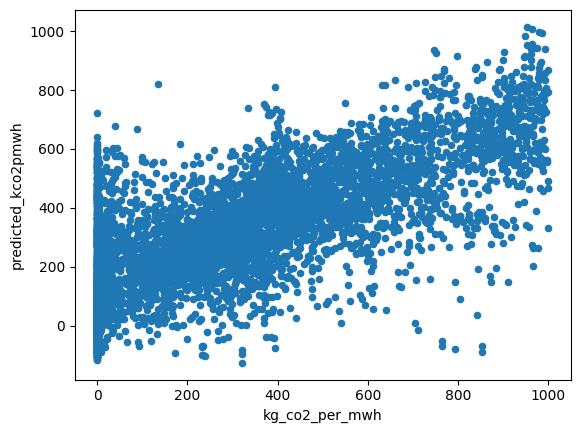

In [442]:
gen_norm_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [443]:
gen_norm_log_check = gen_norm_log.copy()
gen_norm_log_check['predicted_kco2pmwh'] = lmod_n_log.predict(gen_norm_log_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

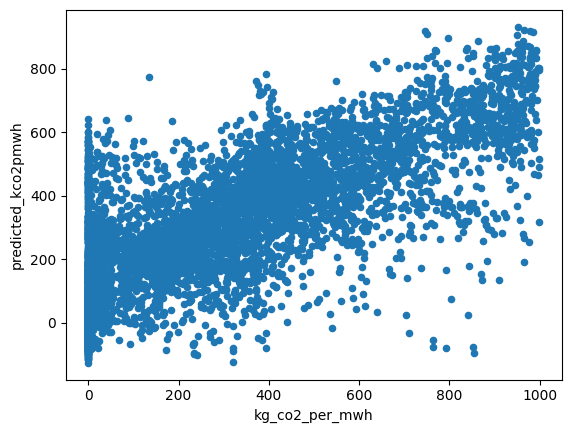

In [444]:
gen_norm_log_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [445]:
gen_norm_bxcx_check = gen_norm_bxcx.copy()
gen_norm_bxcx_check['predicted_kco2pmwh'] = lmod_n_bxcx.predict(gen_norm_bxcx_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

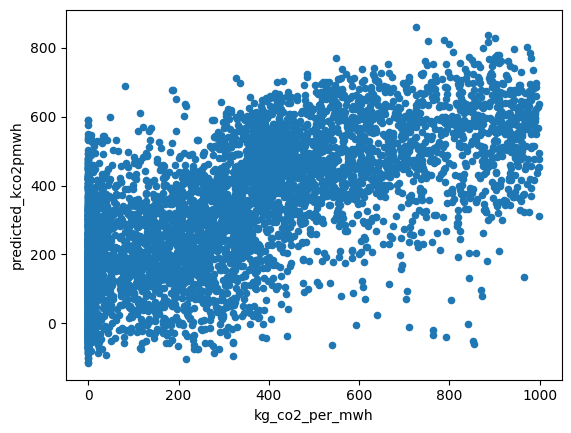

In [446]:
gen_norm_bxcx_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [447]:
gen_norm_sqrt_check = gen_norm_sqrt.copy()
gen_norm_sqrt_check['predicted_kco2pmwh'] = lmod_n_sqrt.predict(gen_norm_sqrt_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

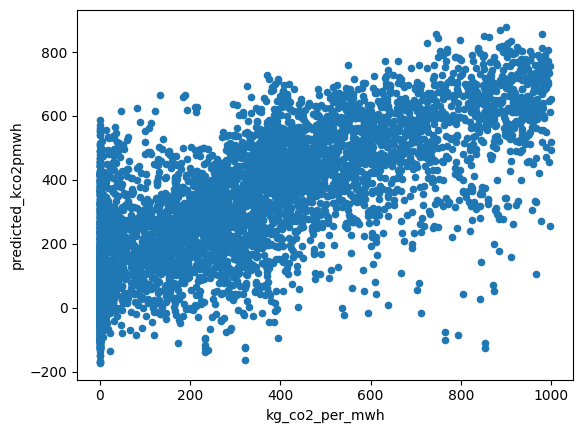

In [448]:
gen_norm_sqrt_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

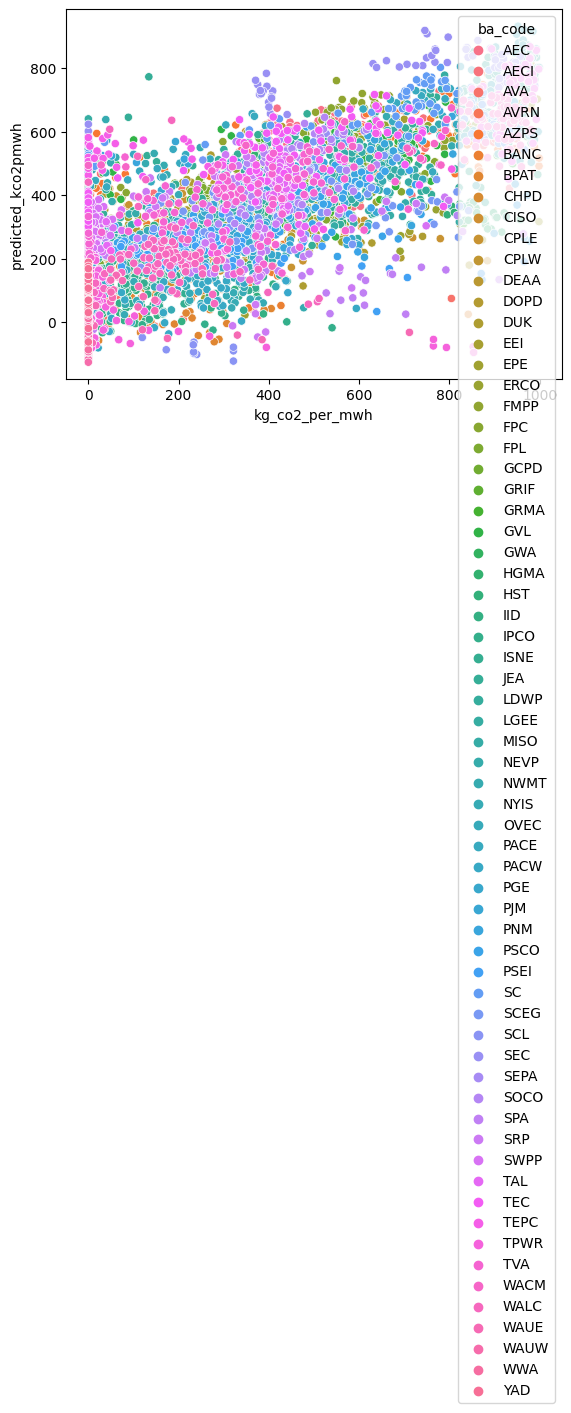

In [449]:
# check visually for potential clustering by BA
sns.scatterplot(data=gen_norm_log_check, x='kg_co2_per_mwh', y='predicted_kco2pmwh', hue='ba_code')

In [450]:
# add features
# use SelectKBest and f_regression from scikit-learn to optimize features?

# tune using grid search on k?
# https://machinelearningmastery.com/feature-selection-for-regression-data/

#Ridge regression has built-in cross validation

#random forest regression


In [451]:
'''
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('tree', view=True)
'''

"\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\ndot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)\ngraph = graphviz.Source(dot_data, format='png')\ngraph.render('tree', view=True)\n"

### Random Forest Regression with hyperparameter optimization using randomized search cross validation

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def rfrBaseline(X_train, y_train):
    rfr_base = RandomForestRegressor(max_depth=2, min_samples_split=2, n_estimators = 100, random_state=1)
    rfr_base.fit(X_train, y_train)
    return rfr_base

def rfrTrainTune(X_train, y_train):
    rfr = RandomForestRegressor()
    #max_depth and min_samples_split are chosen as hyperparameters
    rs = RandomizedSearchCV(rfr, n_iter=10, param_distributions={'max_depth': range(1,30), 'min_samples_split':range(2,50)} \
                        , cv=5, n_jobs=-1, random_state=7, scoring='r2')
    rs.fit(X_train, y_train)
    print(f"rs best params:  {rs.best_params_}")
    print(f"rs best score  {rs.best_score_}")
    # apply best hyperparameter values to random forest regression model
    rfr_tuned = RandomForestRegressor(**rs.best_params_, n_estimators = 100, random_state=42)
    # fit tuned model to data set 
    rfr_tuned.fit(X_train, y_train)
    return rfr_tuned

def rfrTest(rfr_model, X_test, y_test):
    y_pred = rfr_model.predict(X_test)
    error = abs(y_pred - y_test)
    mae = np.mean(error)
    mape = 100 * np.mean(error / y_test)
    accuracy = 100 - mape
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Model Performance')
    print(f"R squared:  {r2}")
    print(f"mean squared error:  {mse}")
    print(f"mean absolute error:  {mae}")
    print(f"mean absolute percentage error:  {mape}")
    print(f"accuracy:  {accuracy}")
    return accuracy
    


In [500]:
X = gen_norm_log[X_names]
y = gen_norm_log['kg_co2_per_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2, shuffle=True)
rfr_base = rfrBaseline(X_train, y_train)
rfr_tuned = rfrTrainTune(X_train, y_train)
base_acc = rfrTest(rfr_base, X_test, y_test)
tuned_acc = rfrTest(rfr_tuned, X_test, y_test)


rs best params:  {'min_samples_split': 11, 'max_depth': 26}
rs best score  0.7587036298677041
Model Performance
R squared:  0.39350782138360385
mean squared error:  52093.81768721019
mean absolute error:  179.6310406269443
mean absolute percentage error:  inf
accuracy:  -inf
Model Performance
R squared:  0.7682917826665957
mean squared error:  19902.260995239354
mean absolute error:  94.42525017147113
mean absolute percentage error:  inf
accuracy:  -inf


In [501]:
def showResiduals(dataset, model, exp_var_names, resp_var_name):
    dataset_check = dataset.copy()
    dataset_check[f"predicted_{resp_var_name}"] = model.predict(dataset_check[exp_var_names])
    dataset_check.plot.scatter(x=resp_var_name, y=f"predicted_{resp_var_name}")

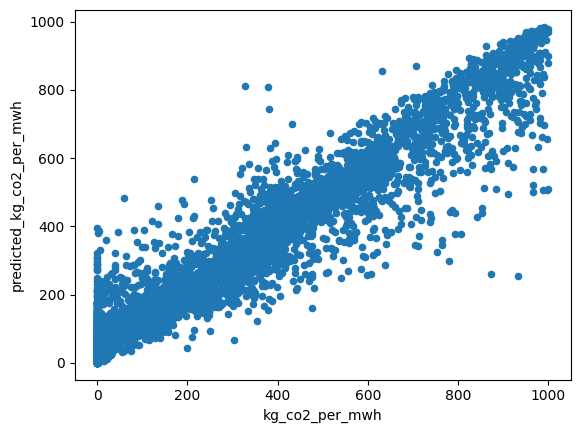

In [502]:
showResiduals(gen_norm_log, rfr_tuned, X_names, 'kg_co2_per_mwh')

## Use model to predict how adding 10 MW of solar generation capacity to a Balancing Authority would affect CO2 emissions

In [570]:
gen_snap = gen_norm_log[(gen_norm_log.period >= '2015-01-01') & (gen_norm_log.period <= '2022-01-01')]
gen_snap.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
1316,AEC,1600,2015-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.953744,0.573430,0.819255,-0.442168,-0.896932,-0.499928,-0.866067,0.159310,0.440966,401.782528
1371,AEC,1664,2015-03-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.705965,0.999995,-0.003225,-0.924803,-0.380447,-0.823829,-0.566839,0.154549,0.432118,624.193110
1426,AEC,1728,2015-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.247898,0.480321,-0.877093,-0.917267,0.398272,-0.993911,-0.110186,0.127945,0.404444,400.843306
1485,AEC,1792,2015-05-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,-0.262452,-0.506504,-0.862238,-0.377462,0.926025,-0.933779,0.357851,0.156932,0.535373,552.186728
1545,AEC,1856,2015-06-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,-0.716546,-0.999639,0.026876,0.401229,0.915978,-0.653786,0.756679,0.148564,0.319718,949.236155


In [571]:
gen_snap.tail()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
4745,YAD,6397,2021-06-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,-0.722519,-0.999029,0.044067,0.413013,0.910725,0.446613,-0.894727,0.204588,0.489653,0.0
4796,YAD,6461,2021-07-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,-0.969581,-0.474653,0.880173,0.931992,0.362480,-0.013398,-0.999910,0.268346,0.632178,0.0
4833,YAD,6518,2021-08-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,-0.959383,0.541298,0.840831,0.909388,-0.415948,-0.484378,-0.874859,0.292545,0.576787,0.0
4937,YAD,6644,2021-10-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,-0.233289,0.453703,-0.891153,-0.418879,-0.908042,-0.995346,-0.096366,0.432036,0.650398,0.0
4984,YAD,6708,2021-11-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0.293434,-0.561034,-0.827793,-0.943196,-0.332235,-0.922712,0.385490,0.389555,0.350346,0.0


In [572]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2011-10-01,89375.94,5.319134,59.514158
1,AVA,2011-10-01,126924.36,43.122421,339.748972
2,AZPS,2011-10-01,1577691.52,1425.363357,903.448703
3,BANC,2011-10-01,17864.18,3.974493,222.483953
4,BPAT,2011-10-01,881106.62,79.474312,90.198292


In [573]:
gen_snap = gen_snap.drop(columns=['index'])

In [574]:
gen_snap = gen_snap.set_index(['ba_code', 'period']).join(genout.set_index(['ba_code', 'period'])[['gen_mwh', 'co2_kton']])

In [575]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon,total_cap_mw
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0


In [576]:
gen_snap = gen_snap.join(genconf.set_index(['ba_code','period'])[['total_cap_mw']])

In [577]:
gen_snap = gen_snap.rename(columns={'SUN':'SUN_old'})
gen_snap['SUN'] = (gen_snap['SUN_old'] * gen_snap['total_cap_mw'] + 10) / (gen_snap['total_cap_mw'])
gen_snap = gen_snap.reset_index()
gen_snap.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN
0,AEC,2015-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,-0.896932,-0.499928,-0.866067,0.159310,0.440966,401.782528,775593.60,311.619957,1881.0,0.005316
1,AEC,2015-03-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,-0.380447,-0.823829,-0.566839,0.154549,0.432118,624.193110,756433.36,472.160492,1881.0,0.005316
2,AEC,2015-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.398272,-0.993911,-0.110186,0.127945,0.404444,400.843306,697589.18,279.623953,1881.0,0.005316
3,AEC,2015-05-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.926025,-0.933779,0.357851,0.156932,0.535373,552.186728,990940.36,547.184115,1881.0,0.005316
4,AEC,2015-06-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.915978,-0.653786,0.756679,0.148564,0.319718,949.236155,527234.28,500.469841,1881.0,0.005316


In [578]:
gen_snap['month'] = gen_snap['period'].apply(lambda m : pd.to_datetime(m).month)
gen_snap = gen_snap.drop(columns='period').groupby(['ba_code', 'month']).mean()
gen_snap.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.083850  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.201354  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.209720  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.209626  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.188663  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...   cos_8mo  sin_13mo  cos_13mo  NG_price   
ba_code month            ...                                           
AEC     1      0.637123  ... -0.314741  0.339287  0.754931  0.217267  \
        2      0.565694  ... -0.178238  0.389278 -0.382770  0.179734   
        3      0.560541  ... -0.128817  0.240276 -0.467214  0.108142   
        4      0.560365  ... -0.004910  0.068688 -0.545820  0.100099   
        5      0.573158  ...  0.462428  0.082561 -0.528016  0.117293   

               avg_mw_per_cap  kg_co2_per_mwh        gen_mwh    co2_kton   
ba_code month                                                              
AEC     1            0.531786      458.961206  794616.266667  376.020138  \
        2            0.262214      462.308910  444679.918000  186.219652   
        3            0.406508      569.774041  687249.173333  343.806164   
        4            0.376735      473.407910  613218.998333  288.621854   
        5            0.428498      516.672675  717652.582500  356.045735   

               total_cap_mw       SUN  
ba_code month                          
AEC     1       1522.333333  0.006736  
        2       1772.440000  0.005745  
        3       1790.533333  0.005674  
        4       1791.333333  0.005671  
        5       1746.500000  0.005849  

[5 rows x 41 columns]

In [579]:
gen_snap['kg_co2_per_mwh_pred'] = rfr_tuned.predict(gen_snap[X_names])
gen_snap.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.083850  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.201354  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.209720  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.209626  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.188663  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...  sin_13mo  cos_13mo  NG_price  avg_mw_per_cap   
ba_code month            ...                                                 
AEC     1      0.637123  ...  0.339287  0.754931  0.217267        0.531786  \
        2      0.565694  ...  0.389278 -0.382770  0.179734        0.262214   
        3      0.560541  ...  0.240276 -0.467214  0.108142        0.406508   
        4      0.560365  ...  0.068688 -0.545820  0.100099        0.376735   
        5      0.573158  ...  0.082561 -0.528016  0.117293        0.428498   

               kg_co2_per_mwh        gen_mwh    co2_kton  total_cap_mw   
ba_code month                                                            
AEC     1          458.961206  794616.266667  376.020138   1522.333333  \
        2          462.308910  444679.918000  186.219652   1772.440000   
        3          569.774041  687249.173333  343.806164   1790.533333   
        4          473.407910  613218.998333  288.621854   1791.333333   
        5          516.672675  717652.582500  356.045735   1746.500000   

                    SUN  kg_co2_per_mwh_pred  
ba_code month                                 
AEC     1      0.006736           476.113168  
        2      0.005745           509.273687  
        3      0.005674           458.674016  
        4      0.005671           483.785247  
        5      0.005849           479.660099  

[5 rows x 42 columns]

In [580]:
gen_snap = gen_snap.reset_index()

In [581]:
gen_snap.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred
0,AEC,1,0.247995,0.704795,0.083850,0.0,0.0,0.0,0.0,0.0,...,0.339287,0.754931,0.217267,0.531786,458.961206,794616.266667,376.020138,1522.333333,0.006736,476.113168
1,AEC,2,0.247995,0.704795,0.201354,0.0,0.0,0.0,0.0,0.0,...,0.389278,-0.382770,0.179734,0.262214,462.308910,444679.918000,186.219652,1772.440000,0.005745,509.273687
2,AEC,3,0.247995,0.704795,0.209720,0.0,0.0,0.0,0.0,0.0,...,0.240276,-0.467214,0.108142,0.406508,569.774041,687249.173333,343.806164,1790.533333,0.005674,458.674016
3,AEC,4,0.247995,0.704795,0.209626,0.0,0.0,0.0,0.0,0.0,...,0.068688,-0.545820,0.100099,0.376735,473.407910,613218.998333,288.621854,1791.333333,0.005671,483.785247
4,AEC,5,0.247995,0.704795,0.188663,0.0,0.0,0.0,0.0,0.0,...,0.082561,-0.528016,0.117293,0.428498,516.672675,717652.582500,356.045735,1746.500000,0.005849,479.660099


In [582]:
gen_snap['co2_kton_pred'] = gen_snap['gen_mwh'] * gen_snap['kg_co2_per_mwh_pred'] / 1e6

In [583]:
gen_snap.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred,co2_kton_pred
0,AEC,1,0.247995,0.704795,0.083850,0.0,0.0,0.0,0.0,0.0,...,0.754931,0.217267,0.531786,458.961206,794616.266667,376.020138,1522.333333,0.006736,476.113168,378.327268
1,AEC,2,0.247995,0.704795,0.201354,0.0,0.0,0.0,0.0,0.0,...,-0.382770,0.179734,0.262214,462.308910,444679.918000,186.219652,1772.440000,0.005745,509.273687,226.463781
2,AEC,3,0.247995,0.704795,0.209720,0.0,0.0,0.0,0.0,0.0,...,-0.467214,0.108142,0.406508,569.774041,687249.173333,343.806164,1790.533333,0.005674,458.674016,315.223338
3,AEC,4,0.247995,0.704795,0.209626,0.0,0.0,0.0,0.0,0.0,...,-0.545820,0.100099,0.376735,473.407910,613218.998333,288.621854,1791.333333,0.005671,483.785247,296.666305
4,AEC,5,0.247995,0.704795,0.188663,0.0,0.0,0.0,0.0,0.0,...,-0.528016,0.117293,0.428498,516.672675,717652.582500,356.045735,1746.500000,0.005849,479.660099,344.229309


<Axes: xlabel='month'>

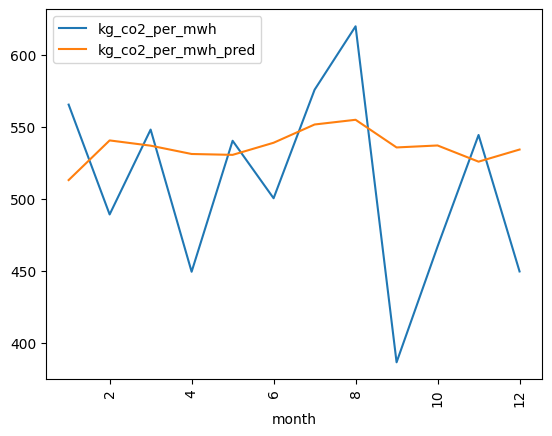

In [585]:
gen_snap[gen_snap.ba_code == 'MISO'].set_index('month')[['kg_co2_per_mwh','kg_co2_per_mwh_pred']].plot(rot=90)

<Axes: xlabel='month'>

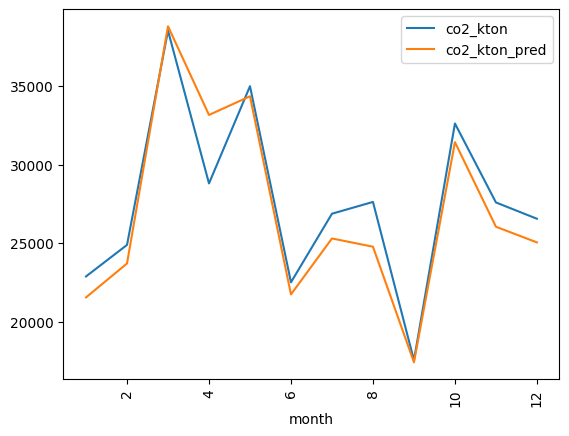

In [586]:
gen_snap[gen_snap.ba_code == 'MISO'].set_index('month')[['co2_kton','co2_kton_pred']].plot(rot=90)

In [587]:
co2_annual = gen_snap.groupby('ba_code')[['co2_kton','co2_kton_pred']].sum()

In [588]:
co2_annual['delta_co2_ktons'] = co2_annual['co2_kton_pred'] - co2_annual['co2_kton']

In [589]:
co2_annual

,co2_kton,co2_kton_pred,delta_co2_ktons
ba_code,,,
AEC,3657.502480,3514.774970,-142.727511
AECI,12051.330232,9797.837941,-2253.492290
AVA,626.216747,458.343609,-167.873139
AVRN,0.000000,16.184072,16.184072
AZPS,12734.642396,12621.869507,-112.772889
...,...,...,...
WACM,26889.035203,25741.938099,-1147.097104
WALC,2702.843354,2970.270893,267.427539
WAUW,0.000000,18.828381,18.828381


<Axes: ylabel='ba_code'>

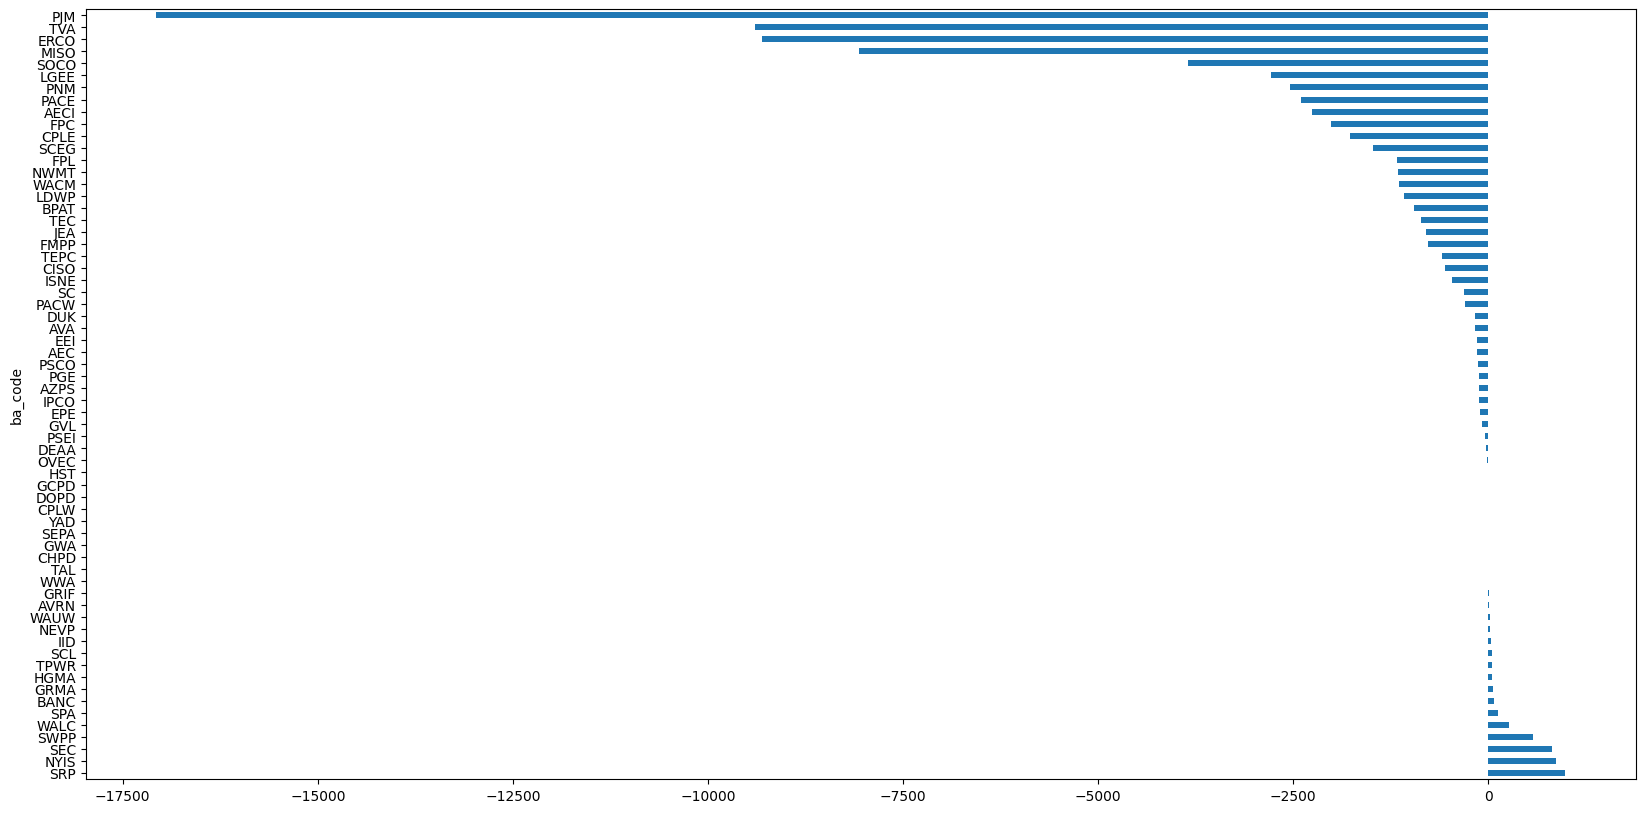

In [590]:
co2_annual['delta_co2_ktons'].sort_values(ascending=False).plot(kind='barh', figsize = (20,10))
